### Import the warnings.

In [2841]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

### Import the useful libraries.

In [2842]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

# Credit EDA Case Study

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. 

It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

### Reading the Data set. 

In [2843]:
#read the data set of "application_data.csv" in inp0.
inp0= pd.read_csv("application_data.csv")
inp0.head() 
#print first 5 rows to analyse the data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [2844]:
# Let's determine what is  the shape of the datset
inp0.shape 
#(307511, 122)

(307511, 122)

In [2845]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [2846]:
# Describe the summary of the dataset to better understand the columns, this will show which column need to be fixed
inp0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Identity Nulls / Missing values in the dataset

In [2847]:
# Let's identity which of the columns have the nulls/missing values which need to be treated
inp0.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [2848]:
# Let's calculate percentage of the nulls/missing values
(inp0.isnull().sum() / len(inp0) * 100).head(60)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [2849]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(inp0.isnull().sum() / len(inp0) * 100).sort_values(ascending = False).head(60)   

# it looks like approx of 50 cols are having missing values more than 30%, so we can understand each col wisely
# and will take informative decision what to do with these cols


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [2850]:
# Figure out the number of columns where we have nulls/missing values

missing_values_sum = inp0.isnull().sum() / len(inp0) * 100
len(missing_values_sum)


122

As we can see above, information is more or less related to the client's living standards. What sort of property does he possess, what luxury such as a car he owns, etc. It gives a bit of clarity of the living standard of a client such as details of the property he owns, size of the property, how many entrances/flooring/elevators the property posses, which car, and how old is a car is. These details is having somewhat more than 30% nulls/missing values, so we can drop these columns without affecting our analysis.


In [2851]:
# These values are in percentages, which is basically percentages of nulls/missing values
missing_values_sum 

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [2852]:
# Let's list down the number of the columns where we have the nulls/missing values more than 30%

missing_values_col_30_perct = missing_values_sum[missing_values_sum.values > (0.3 * len(missing_values_sum))]
len(missing_values_col_30_perct)

49

In [2853]:
# Let's list down the number of the columns where we have the nulls/missing values more than 35%

missing_values_col_35_perct = missing_values_sum[missing_values_sum.values > (0.35 * len(missing_values_sum))]
len(missing_values_col_35_perct)

49

In [2854]:
# Let's list down the number of the columns where we have the nulls/missing values more than 40%

missing_values_col_40_perct = missing_values_sum[missing_values_sum.values > (0.40 * len(missing_values_sum))]
len(missing_values_col_40_perct)


44

In [2855]:
# Since 30-40% all are having approximate the same length so we can take lower one 30%. If any col has more than 30% nulls/missing values we would drop it
# Dropping 49 columns

inp0.drop(missing_values_col_30_perct.index, axis = 1, inplace = True)
inp0.shape # (307511, 73)

# Dopping the columns with given index and axis = 1, where we are explicitly indicating we need to drop the column in the same dataset itself. 

(307511, 73)

In [2856]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [2857]:
# Let's validate for nulls/missing values in the columns after dropping 
(inp0.isnull().sum() / len(inp0) * 100).sort_values(ascending = False).head(60) 

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [2858]:
# Searching for the column for nulls/missing values

(inp0.isnull().sum()).sort_values(ascending = False).head(60) 


OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_21                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_16            

### Impute Missing Values In Some Columns

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [2859]:
inp0['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

'OCCUPATION_TYPE' is a Categorical nominal variable, so we can impute the missing values for the column 'OCCUPATION_TYPE' with mode. Categorical variables are always accessed by mode evaluation

In [2860]:
inp0['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [2861]:
#Fill up the nulls/missing values in the OCCUPATION_TYPE column with the above value
inp0['OCCUPATION_TYPE'] = inp0['OCCUPATION_TYPE'].fillna(inp0['OCCUPATION_TYPE'].mode()[0])

In [2862]:
# Let's see if imputation was done succesfully for the column 'OCCUPATION_TYPE' and no nulls/missing values would be zero
inp0['OCCUPATION_TYPE'].isnull().sum()

0

In [2863]:
# 'AMT_REQ_CREDIT_BUREAU_YEAR' - stands for Number of enquiries to Credit Bureau about the client one day year 
# 0.0 which has highest percentage - stands for no such enquiries done. 
# Although 'AMT_REQ_CREDIT_BUREAU_YEAR' holds a numeric value but its representation is more categorical in nature in terms of business
inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize = True)



0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
18.0    0.000015
19.0    0.000015
16.0    0.000011
25.0    0.000004
21.0    0.000004
22.0    0.000004
20.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [2864]:
inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

0.0

In [2865]:
#Fill up the nulls/missing values in the AMT_REQ_CREDIT_BUREAU_YEAR column with the above value
inp0['AMT_REQ_CREDIT_BUREAU_YEAR'] = inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

In [2866]:
# Likewise, columns 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR'
# all refering the similar information which is - Number of enquiries to Credit Bureau but with varied duration as per name suggested.
# These all are the categorical variable which can be imputed as we have done in case of 'AMT_REQ_CREDIT_BUREAU_YEAR'

print(inp0['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
print(inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])



0.0
0.0
0.0
0.0
0.0


In [2867]:
#Fill up the nulls/missing values in the AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR column with the above value
inp0['AMT_REQ_CREDIT_BUREAU_QRT'] = inp0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_MON'] = inp0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_WEEK'] = inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_DAY'] = inp0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_HOUR'] = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])



(inp0.isnull().sum() / len(inp0) * 100).sort_values(ascending = False).head(10) 


EXT_SOURCE_3                19.825307
NAME_TYPE_SUITE              0.420148
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
dtype: float64

In [2868]:
# 'AMT_GOODS_PRICE' - related to previous application - Price for Goods client asked for in previous application
inp0['AMT_GOODS_PRICE'].value_counts(normalize = True) 

450000.0     0.084698
225000.0     0.082289
675000.0     0.081248
900000.0     0.050177
270000.0     0.037197
               ...   
592452.0     0.000003
1130125.5    0.000003
362632.5     0.000003
498856.5     0.000003
1271875.5    0.000003
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

In [2869]:
inp0['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [2870]:
inp0['AMT_GOODS_PRICE'].median() # type in which category of numerical variable client would fall into

450000.0

In [2871]:
#Fill up the nulls/missing values in the AMT_GOODS_PRICE column with the above value
inp0['AMT_GOODS_PRICE'] = inp0['AMT_GOODS_PRICE'].fillna(inp0['AMT_GOODS_PRICE'].median())

In [2872]:
inp0['AMT_GOODS_PRICE'].isna().sum() 

0

In [2873]:
# 'AMT_ANNUITY' - Loan annuity
inp0['AMT_ANNUITY'].value_counts(normalize = True)

9000.0     0.020764
13500.0    0.017932
6750.0     0.007411
10125.0    0.006618
37800.0    0.005210
             ...   
4635.0     0.000003
65209.5    0.000003
70920.0    0.000003
85792.5    0.000003
51331.5    0.000003
Name: AMT_ANNUITY, Length: 13672, dtype: float64

In [2874]:
inp0['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [2875]:
# after describing the col AMT_ANNUITY we saw there is a huge difference b/w 50% and max / 75% and max, which means it contains outliers.
inp0['AMT_ANNUITY'].median() # type in which category of numerical variable client would fall into
# median would be a good value to impute


24903.0

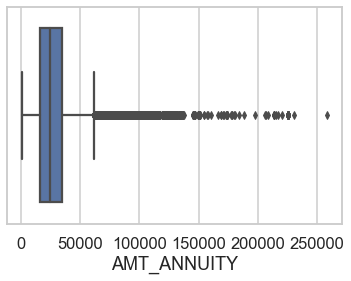

In [2876]:
# plot the boxplot of "AMT_ANNUITY" column.
sns.boxplot(inp0["AMT_ANNUITY"])
plt.show()

In [2877]:
#Fill up the nulls/missing values in the AMT_ANNUITY column with the above value
inp0['AMT_ANNUITY'] = inp0['AMT_ANNUITY'].fillna(inp0['AMT_ANNUITY'].median())

In [2878]:
# Searching for the column for nulls/missing values

(inp0.isnull().sum()).sort_values(ascending = False).head(10) 


EXT_SOURCE_3                60965
NAME_TYPE_SUITE              1292
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
EXT_SOURCE_2                  660
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
FLAG_DOCUMENT_5                 0
dtype: int64

In [2879]:
inp0['EXT_SOURCE_2'].value_counts(normalize = True) # let's see we need to fix these or not

0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ...   
0.157007    0.000003
0.721955    0.000003
0.032513    0.000003
0.204329    0.000003
0.064909    0.000003
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

### Errors in Data types and Data - Focus on Standardising

In [2880]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [2881]:
# This is not the efficient way but this way you can see all the values and can standardised them
for column in inp0:
    print("{0} ------ {1}".format(column, inp0[column].unique()))  

SK_ID_CURR ------ [100002 100003 100004 ... 456253 456254 456255]
TARGET ------ [1 0]
NAME_CONTRACT_TYPE ------ ['Cash loans' 'Revolving loans']
CODE_GENDER ------ ['M' 'F' 'XNA']
FLAG_OWN_CAR ------ ['N' 'Y']
FLAG_OWN_REALTY ------ ['Y' 'N']
CNT_CHILDREN ------ [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL ------ [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT ------ [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY ------ [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE ------ [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE ------ ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE ------ ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ------ ['Secondary / secondary special' 'Higher education' 'Incomplete high

In [2882]:
# CODE_GENDER need to be imputed as we can see there should be either value M / F
inp0['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [2883]:
# Since, this is categorical nominal datatype, so let's find a mode and impute with the given mode
inp0['CODE_GENDER'].value_counts(normalize = True)


F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [2884]:
inp0['CODE_GENDER'].mode()[0]

'F'

In [2885]:
inp0.loc[inp0['CODE_GENDER'] == 'XNA','CODE_GENDER'] = inp0['CODE_GENDER'].mode()[0]
inp0['CODE_GENDER'].value_counts(normalize = True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

In [2886]:
# ORGANIZATION_TYPE need to be imputed as we can see there is some organization with name 'XNA'
inp0['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [2887]:
# Since, this is categorical nominal datatype, so let's find a mode and impute with the given mode, but before that let's see the distribution
inp0['ORGANIZATION_TYPE'].value_counts(normalize = True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [2888]:
# After anlysising the distribution we figured out 'XNA' is the 2nd largest in the 'ORGANIZATION_TYPE', imputation with mode is not a good idea over here we can rather ignore it with NAN

inp0.loc[inp0['ORGANIZATION_TYPE'] == 'XNA','ORGANIZATION_TYPE'] = np.NaN
inp0['ORGANIZATION_TYPE'].value_counts(normalize = True)


Business Entity Type 3    0.269663
Self-employed             0.152346
Other                     0.066166
Medicine                  0.044393
Business Entity Type 2    0.041854
Government                0.041263
School                    0.035271
Trade: type 7             0.031059
Kindergarten              0.027287
Construction              0.026656
Business Entity Type 1    0.023733
Transport: type 4         0.021409
Trade: type 3             0.013850
Industry: type 9          0.013358
Industry: type 3          0.013001
Security                  0.012878
Housing                   0.011732
Industry: type 11         0.010724
Military                  0.010447
Bank                      0.009943
Agriculture               0.009733
Police                    0.009285
Transport: type 2         0.008741
Postal                    0.008555
Security Ministries       0.007829
Trade: type 2             0.007536
Restaurant                0.007183
Services                  0.006247
University          

In [2889]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [2890]:
[col for col in inp0 if col.startswith('FLAG')]
# Below mentioned columns are of no use they contains extra information whether certain information/document provided by the client or not. Let's delete all of them except 
# FLAG_OWN_CAR and FLAG_OWN_REALTY as they contain meaningful information

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [2891]:
# Let's drop such columns from the dataset except 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' as they are useful for analysis
inp0.drop(labels = ([col for col in inp0 if col.startswith('FLAG')][2:]), axis = 1, inplace = True)

In [2892]:
[col for col in inp0 if col.startswith('REGION')]
# Below mentioned columns are of no use they contains extra information where client lives and what sort of rating we consider for that specific area

['REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [2893]:
# Let's drop such columns from the dataset
inp0.drop(labels = ([col for col in inp0 if col.startswith('REGION')]), axis = 1, inplace = True)

In [2894]:
# Let's determine shape to figure out how many columns and what sort of columns we hava 
inp0.shape


(307511, 44)

In [2895]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Univariate Analysis - Find the Outliers For Numerical Variables

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**




In [2896]:
inp0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  3.075110e+05  307511.000000     3.075110e+05  307511.000000   
mean   5.990260e+05   27108.487841     5.383163e+05  -16036.995067   
std    4.024908e+05   14493.461065     3.692890e+05    4363.988632   
min    4.500000e+04    1615.500000     4.050000e+04  -25229.000000   
25%    2.700000e+05   16524.000000     2.385000e+05  -19682.000000   
50%    5.135310e+05   24903.000000     4.500000e+05  -15750.000000   
75%    8.086500e+05   34596.000000     6.795000e+05  -12413.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count  307511.000000      307511.000000    307511.000000    307509.000000   
mean    63815.045904       -4986.120328     -2994.202373         2.152665   
std    141275.766519        3522.886321      1509.450419         0.910682   
min    -17912.000000      -24672.000000     -7197.000000         1.000000   
25%     -2760.000000       -7479.500000     -4299.000000         2.000000   
50%     -1213.000000       -4504.000000     -3254.000000         2.000000   
75%      -289.000000       -2010.000000     -1720.000000         3.000000   
max    365243.000000           0.000000         0.000000        20.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           307511.000000           307511.000000   
mean                 0.078173                0.230454   
std                  0.268444                0.421124   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   EXT_SOURCE_3  \
count            307511.000000  3.068510e+05  246546.000000   
mean                  0.179555  5.143927e-01       0.510853   
std                   0.383817  1.910602e-01       0.194844   
min                   0.000000  8.173617e-08       0.000527   
25%                   0.000000  3.924574e-01       0.

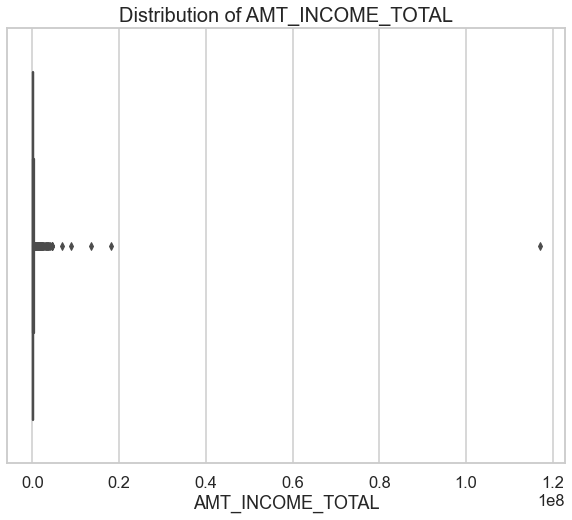

In [2897]:
# 'AMT_INCOME_TOTAL' tells us the income of the client. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0["AMT_INCOME_TOTAL"])
plt.title('Distribution of AMT_INCOME_TOTAL', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **We can clearly visualize that col 'AMT_INCOME_TOTAL' has an outliers**
- **Major density lies somewhat between >0 and <2 M**
- **clearly beyond that something around 117M is an outlier.**
- **Prefer bining**




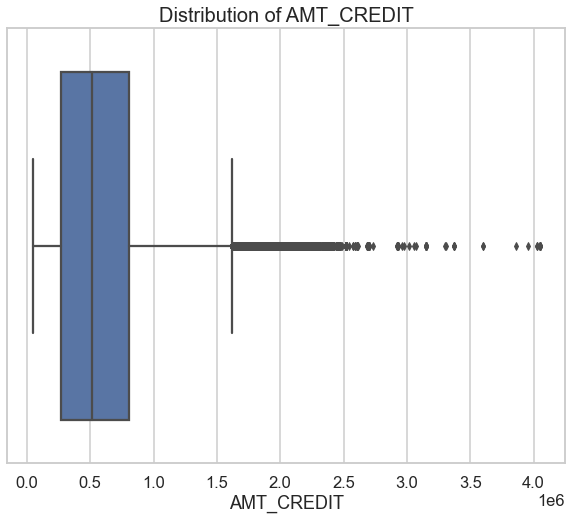

In [2898]:
# 'AMT_CREDIT' tells us about the Credit amount of the loan. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **We can clearly visualize that col 'AMT_CREDIT' has an outliers, amount credited beyond 30M/3crore is a huge amount as a loan amount**
- **Major density lies somewhat between >0 and <1 M**
- **clearly beyond that something around 30M is an outlier.**
- **Prefer bining**




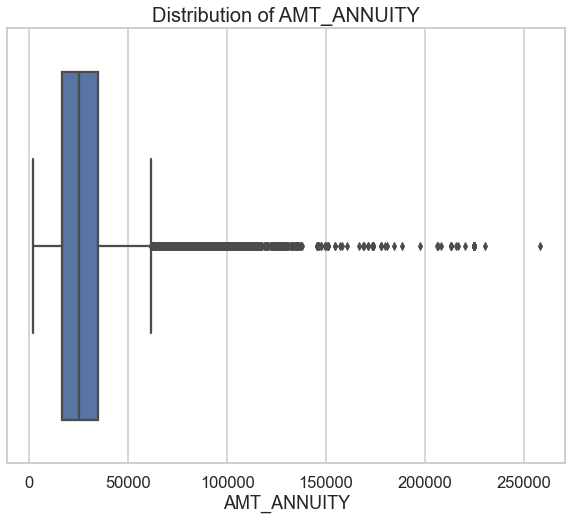

In [2899]:
# 'AMT_ANNUITY' tells us about Loan annuity. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **We can clearly visualize that col 'AMT_ANNUITY' has an outliers**
- **Major density lies somewhat between >0 and <50000M**
- **AMT_ANNUITY > 250000 is an outlier.**
- **Later, we can decide how we wanted to treat, maybe bining/capping**




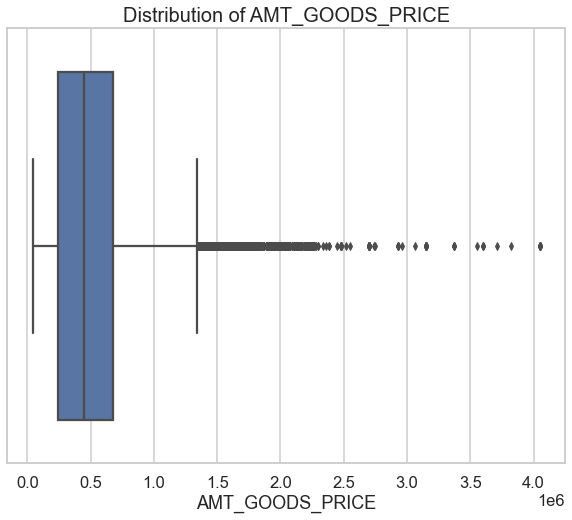

In [2900]:
# 'AMT_GOODS_PRICE' - Goods price of good that client asked for (if applicable) on the previous application. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0['AMT_GOODS_PRICE'])
plt.title('Distribution of AMT_GOODS_PRICE', fontdict={'fontsize':20} )
plt.show()


In [2901]:
days_cols = [col for col in inp0 if col.startswith('DAYS')]
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

- DAYS_BIRTH - Client's age in days at the time of application
- DAYS_EMPLOYED - How many days before the application the person started current employment
- DAYS_REGISTRATION - How many days before the application did client change his registration
- DAYS_ID_PUBLISH - How many days before the application did client change the identity document with which he applied for the loan
- DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone

- We can change them from -ve to absolute value won't make any difference in the meaning they hold. 

In [2902]:
inp0[days_cols] = inp0[days_cols].apply(lambda x : abs(x))
inp0[days_cols].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

In [2903]:
# Let's convert the DAYS_BIRTH, DAYS_EMPLOYED and DAYS_REGISTRATION to years for better analysis
inp0['DAYS_BIRTH']= (inp0['DAYS_BIRTH']/365).astype(int)

inp0['DAYS_EMPLOYED']= (inp0['DAYS_EMPLOYED']/365).astype(int)

inp0['DAYS_REGISTRATION']= (inp0['DAYS_REGISTRATION']/365).astype(int)

# Let's rename the columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION as we are planning to convert them to years for better visulization
inp0.rename(columns={'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' : 'YEARS_REGISTRATION'}, inplace=True)



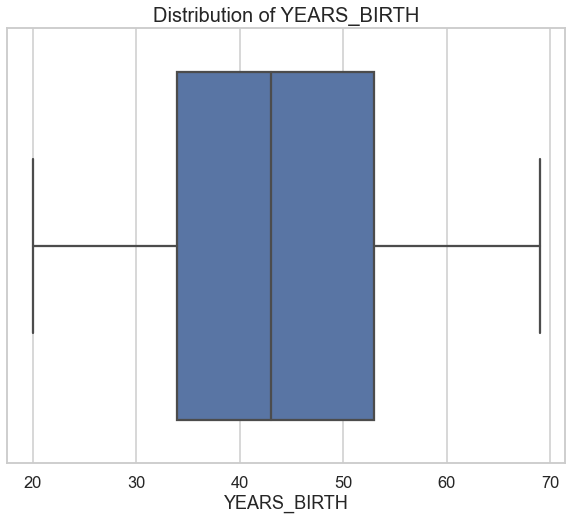

In [2904]:
# 'YEARS_BIRTH' tells us about the age of the client. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0['YEARS_BIRTH'])
plt.title('Distribution of YEARS_BIRTH', fontdict={'fontsize':20} )
plt.show()

Few points can be concluded from the graph above.

 		
- **We can clearly visualize that col 'YEARS_BIRTH' has no outliers**
- **Major density falls somewhat between >=35 and <=53/54**




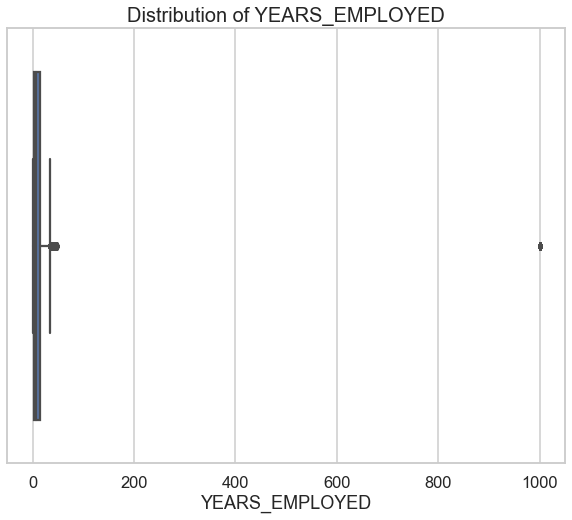

In [2905]:
# 'YEARS_EMPLOYED' tells us about the how old client is in market with employment status. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0['YEARS_EMPLOYED'])
plt.title('Distribution of YEARS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

Few points can be concluded from the graph above.

 		
- **We can clearly visualize that col 'YEARS_EMPLOYED' has an outliers**
- **clearly 'YEARS_EMPLOYED' = 1000 is an outlier as this is practically not possible**




In [2906]:
inp0[inp0['YEARS_EMPLOYED'] > 75]['YEARS_EMPLOYED'].count()

# These records can be deleted because practically a person can work for maxuimum of 60 years if he starts earning from at the age of 15 to till 75. Let's delete beyond that as they are in-practical values

55374

In [2907]:
inp0.drop(inp0[inp0['YEARS_EMPLOYED'] > 75].index, inplace = True)
inp0[inp0['YEARS_EMPLOYED'] > 75]['YEARS_EMPLOYED'].count()

0

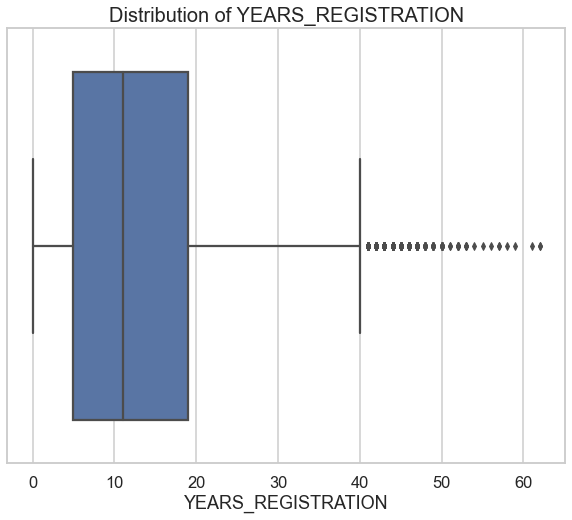

In [2908]:
# 'YEARS_REGISTRATION' tells us about How many days before the application did client change his registration. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0['YEARS_REGISTRATION'])
plt.title('Distribution of YEARS_REGISTRATION', fontdict={'fontsize':20} )
plt.show()

Few points can be concluded from the graph above.

 		
- **We can clearly visualize that col 'YEARS_REGISTRATION' has an outliers**
- **clearly 'YEARS_REGISTRATION' > 60 years is an outlier as this is practically not possible**




### Univariate Analysis -  Categorical Variables

In [2909]:
# Distribution of 'OCCUPATION_TYPE'
inp0['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 38.155844
Sales staff              12.731967
Core staff               10.934532
Managers                  8.475948
Drivers                   7.378132
High skill tech staff     4.513419
Accountants               3.891932
Medicine staff            3.385858
Security staff            2.665614
Cooking staff             2.358242
Cleaning staff            1.844632
Private service staff     1.051809
Low-skill Laborers        0.830104
Waiters/barmen staff      0.534630
Secretaries               0.517576
Realty agents             0.297854
HR staff                  0.223291
IT staff                  0.208617
Name: OCCUPATION_TYPE, dtype: float64

In [2910]:
def annotateGraph(plot):
    for p in plot.patches:
        height = p.get_height()
        plot.annotate('{:.2f}'.format(height),
          xy=(p.get_x() + p.get_width() / 2, height),
          xytext=(0, 3), # 3 points vertical offset
          textcoords="offset points",
          ha='center', va='bottom')
                                                                  

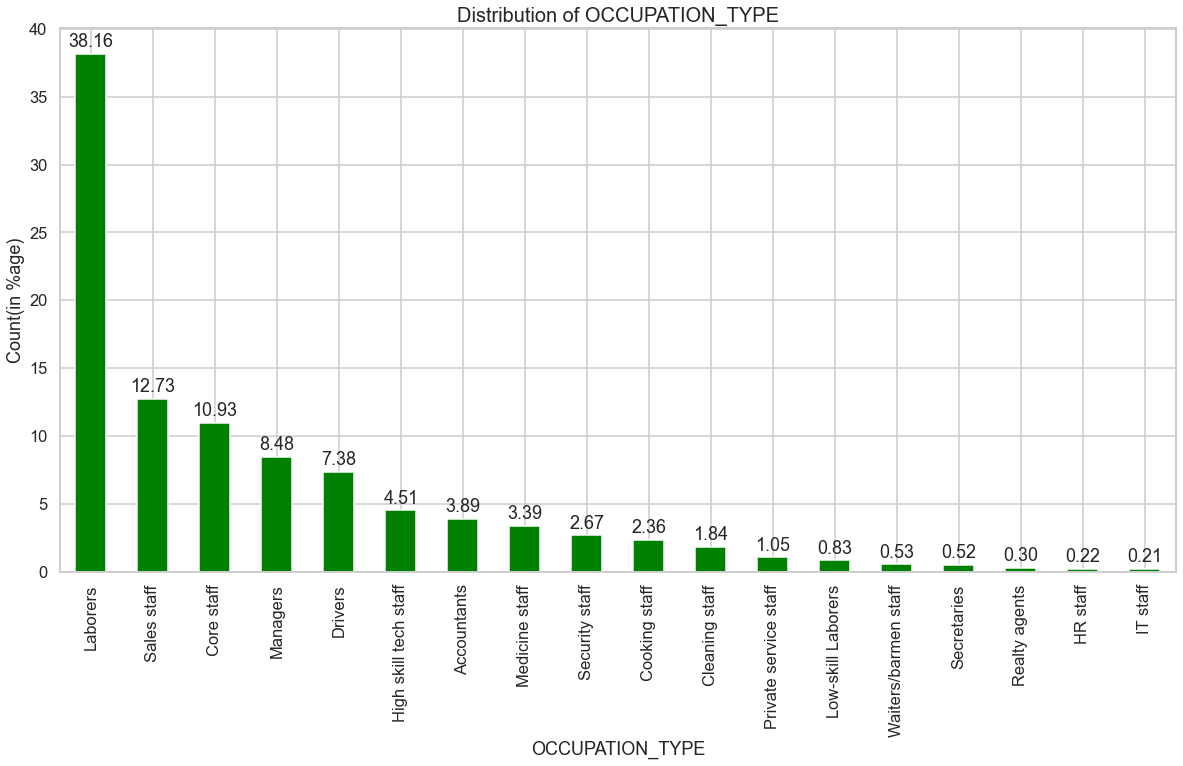

In [2911]:
#plot the bar graph of percentage of OCCUPATION_TYPE
plt.figure(figsize=[20,10])
sns.set_style('whitegrid')
plot = (inp0['OCCUPATION_TYPE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of OCCUPATION_TYPE', fontdict={'fontsize':20} )
plt.show()


Few points can be concluded from the graph above.

 		
- **Labourers, Sales Staff and Core Staff type of occupation category constitute the majority of the people with application**
- **whereas IT Staff, HR Staff looks like falls to the least percetange**





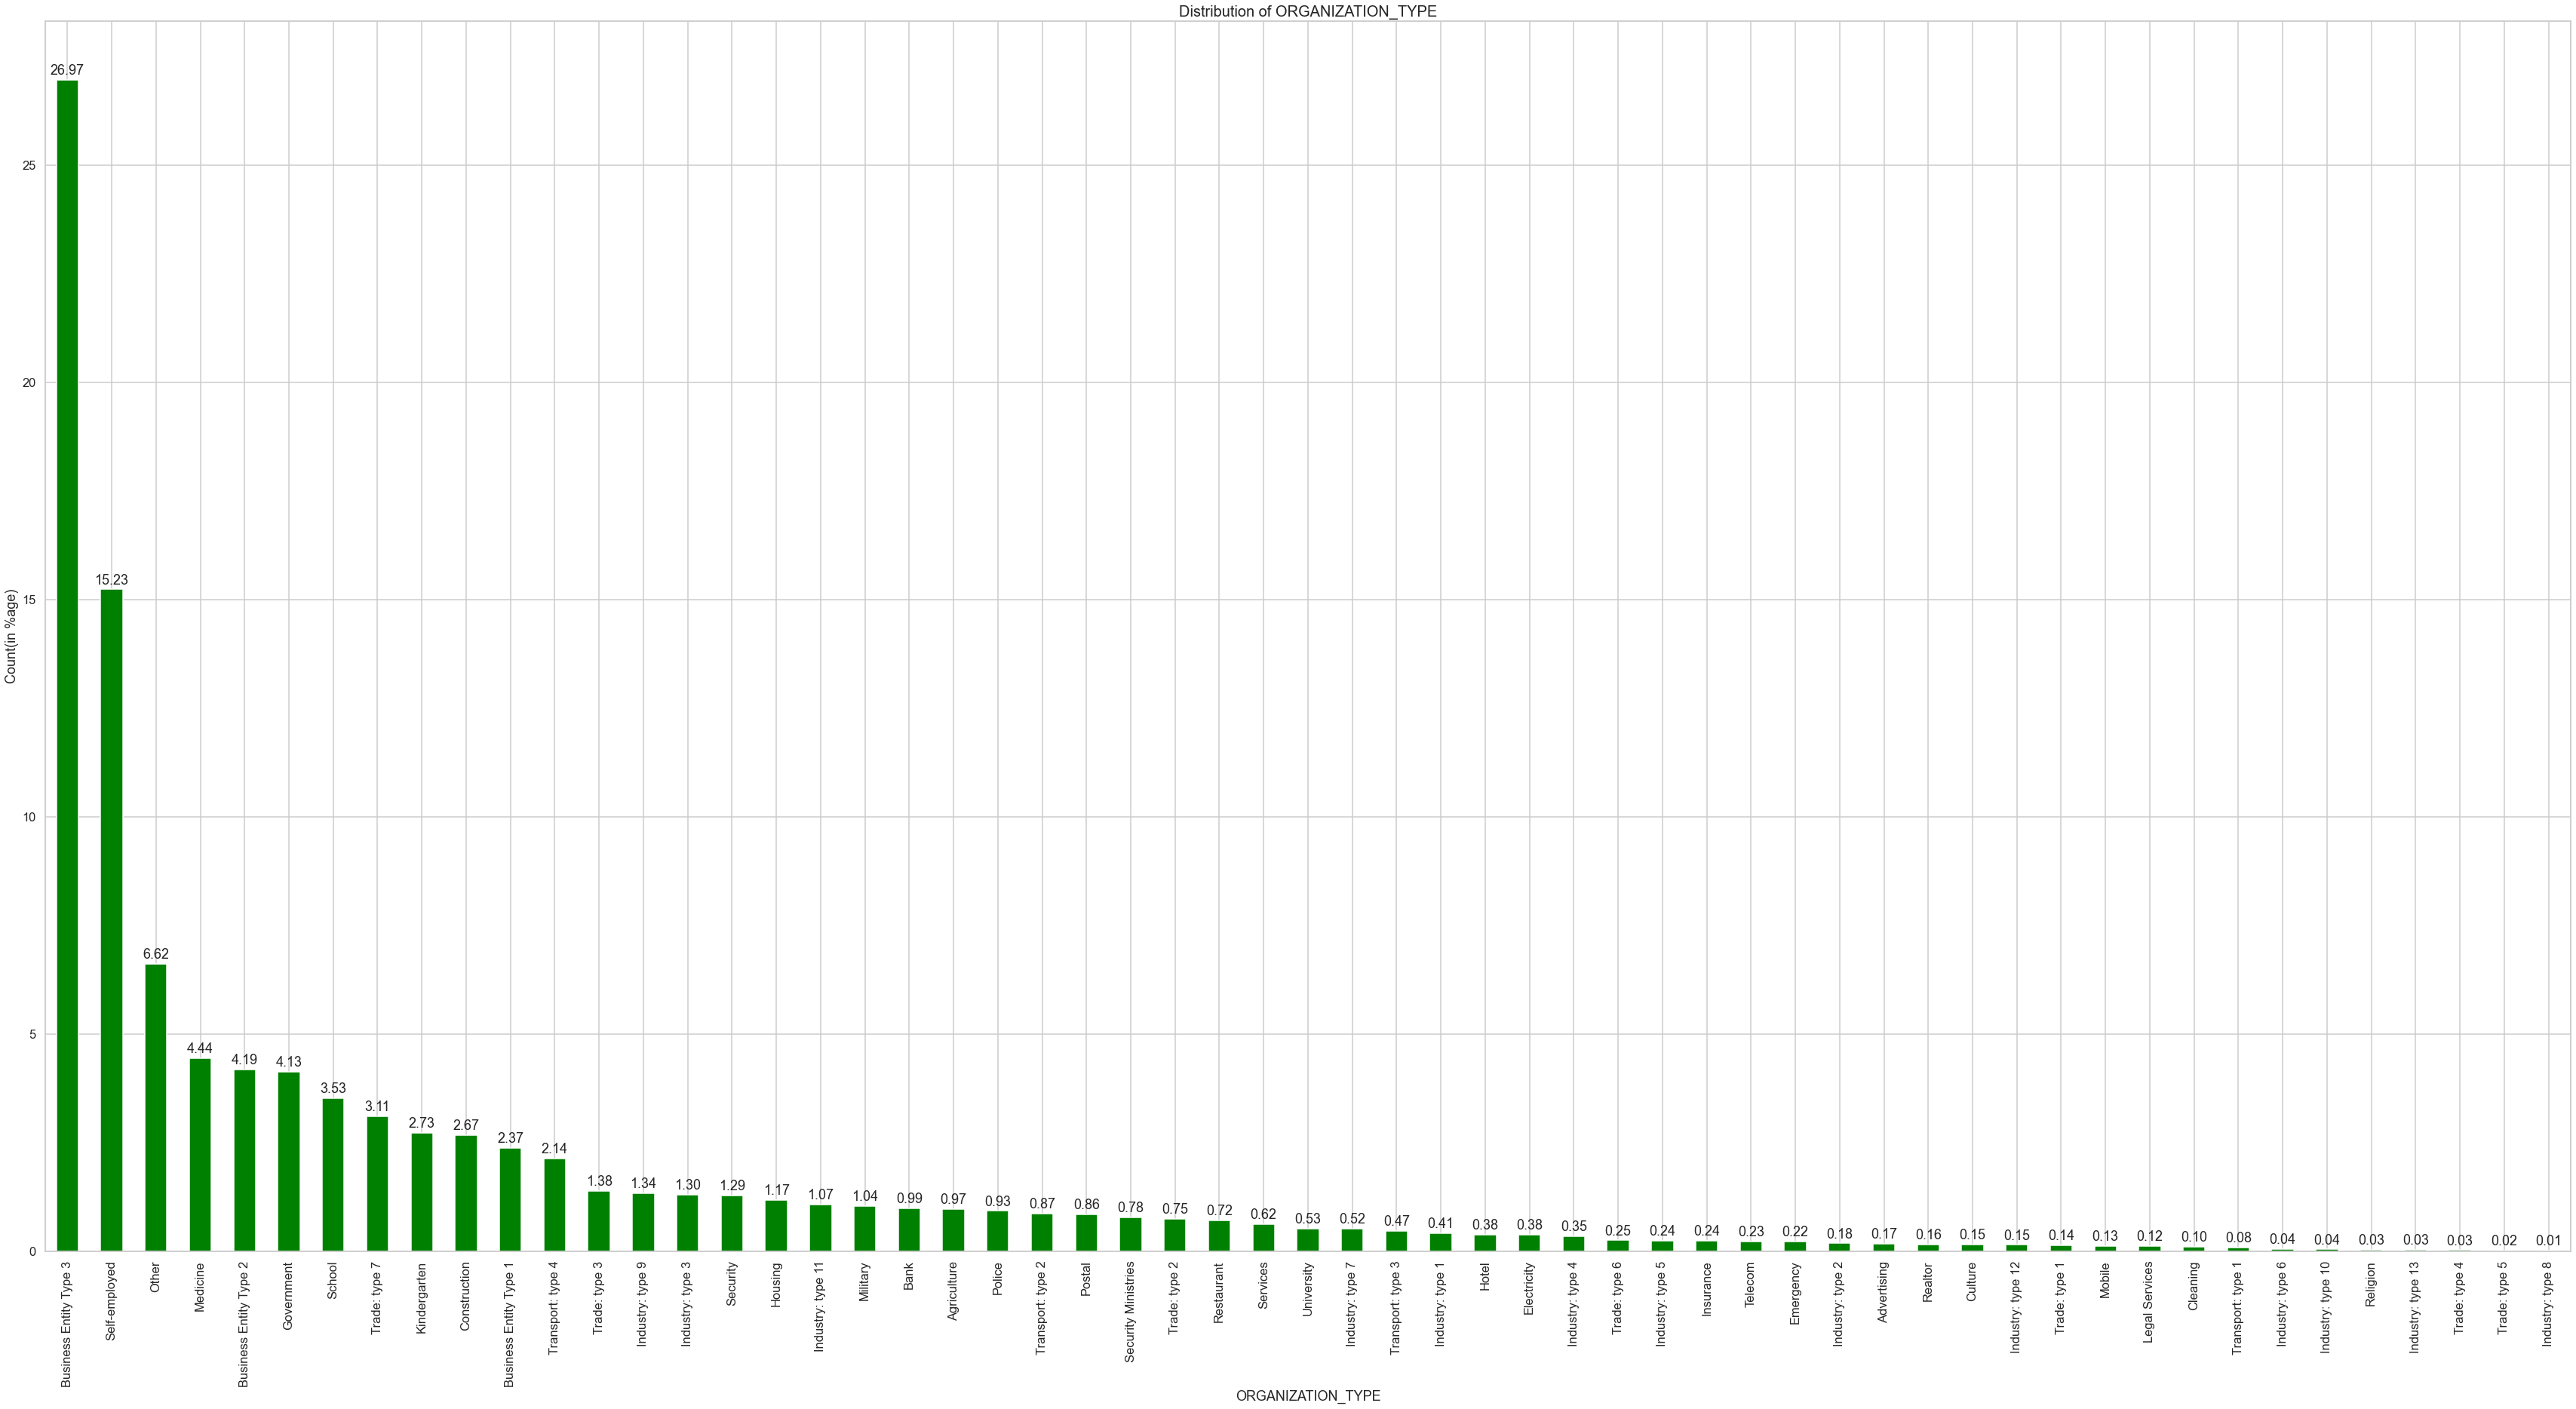

In [2912]:
#plot the bar graph of percentage of ORGANIZATION_TYPE
plt.figure(figsize=[60,30])
sns.set_style('whitegrid')
plot = (inp0['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of ORGANIZATION_TYPE', fontdict={'fontsize':20} )
plt.show()

Few points can be concluded from the graph above.

 		
- **Business Entity Type 3, Self-employed and Medicine organizations have majority of the loan applications after analysing the distribution of ORGANIZATION_TYPE**





In [2913]:
# Let's check the distribution of the Target variable 
# Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments 
# of the loan in our sample, 0 - all other cases)

inp0["TARGET"].value_counts(normalize=True)*100


0    91.340025
1     8.659975
Name: TARGET, dtype: float64

### Checking Imbalance

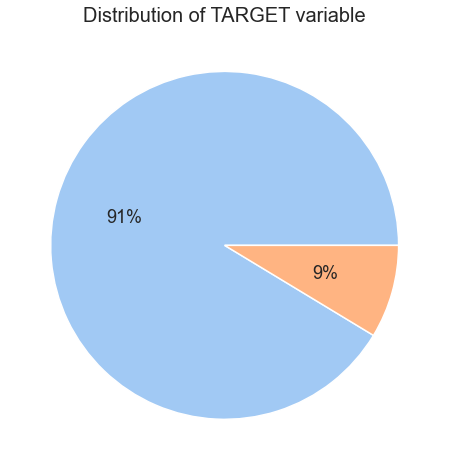

In [2914]:
plt.figure(figsize=[20,8])
colors = sns.color_palette('pastel')[0:5]
sns.set_style('whitegrid')
plt.title('Distribution of TARGET variable', fontdict={'fontsize':20} )
plt.pie((inp0["TARGET"].value_counts(normalize=True)*100), colors = colors, autopct='%.0f%%')
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Around 91% of loan application are not with payment difficulties**
- **Around 9% of loan application are with payment difficulties**
- **Imbalance = 10 : 1**

### Divide the dataset into two different datasets based upon 'Target' variable - Segmented Univariate analysis/Distribution 

In [2915]:
inp0_target0 = inp0.loc[inp0.TARGET == 0]
inp0_target1 = inp0.loc[inp0.TARGET == 1]

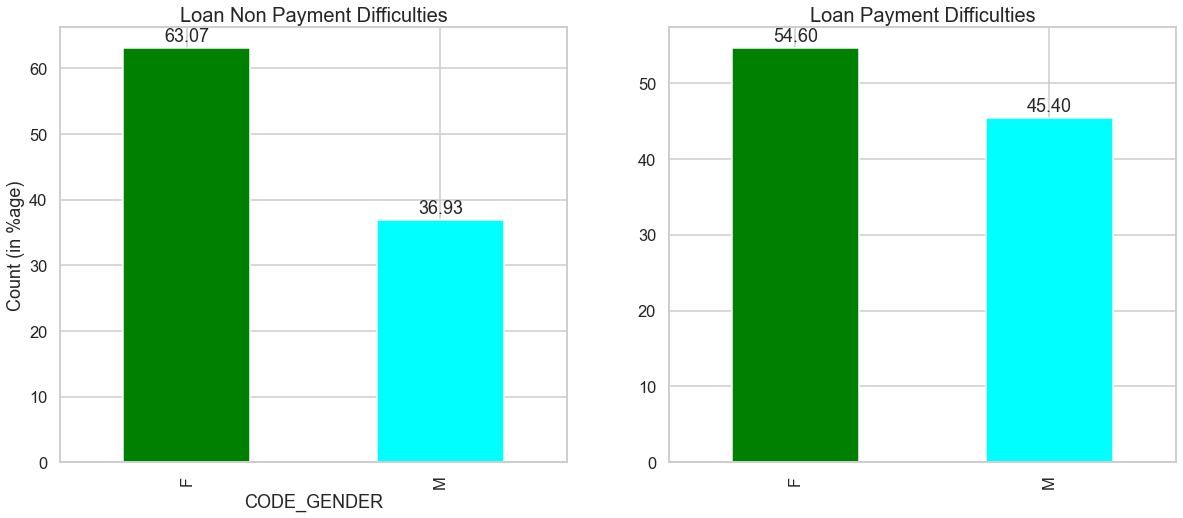

In [2916]:
# CODE_GENDER Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('CODE_GENDER')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["CODE_GENDER"].value_counts(normalize=True)*100).plot.bar(color=['green', 'cyan'])
annotateGraph(plot)                                                      
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# CODE_GENDER Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["CODE_GENDER"].value_counts(normalize=True)*100).plot.bar(color=['green', 'cyan'])
annotateGraph(plot)
plt.show()    

**Few points can be concluded from the graph above.**

 		
- **Comparing the Payment and Non Payment Difficulties on the basis of CODE_GENDER, high percentage of Females for stepping forward for a loan**
- **increase in the percentage in Male for loan Payment Difficulties when compared with Non-Payment Difficulties**
- **increase in the percentage in Female for loan Non-Payment Difficulties when compared with Payment Difficulties**
- **Men can turn out to be defaulter, not women as per the above graph**



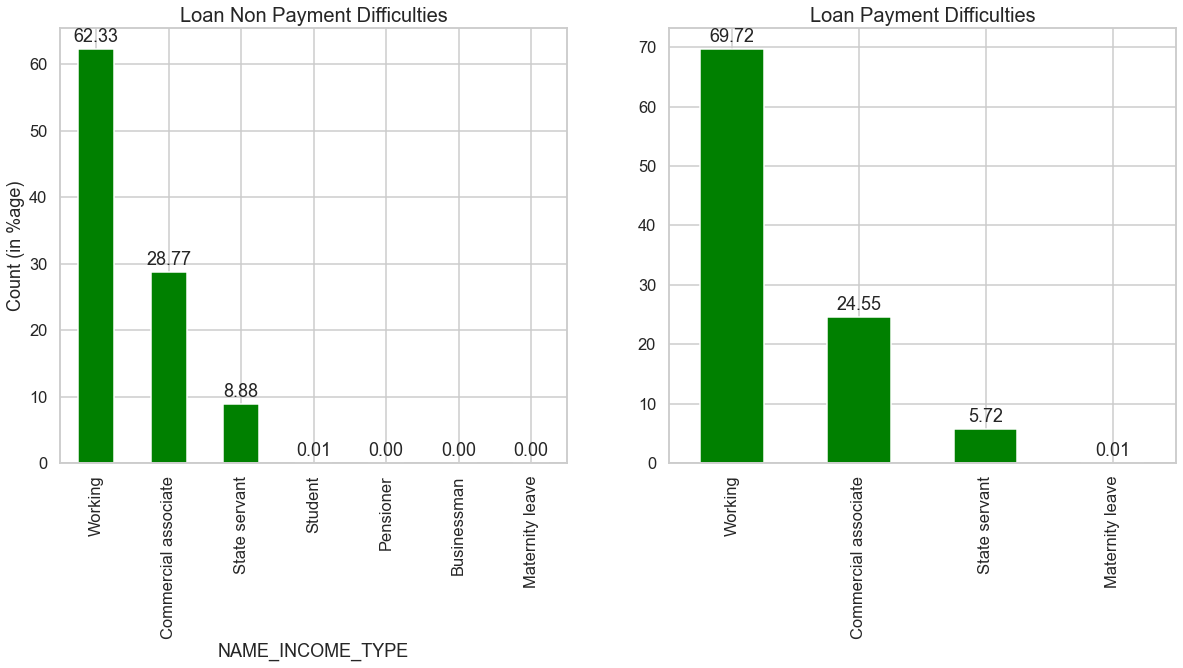

In [2917]:
# NAME_INCOME_TYPE - Clients income type (businessman, working, maternity leave,…), Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)


plt.ylabel('Count (in %age)')
plt.xlabel('NAME_INCOME_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_INCOME_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot) 
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# NAME_INCOME_TYPE Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["NAME_INCOME_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot) 
plt.show()  

**Few points can be concluded from the graph above.**

 		
- **Student, Pensioner, Businessman are less likely to be turned out as a defaulter**        



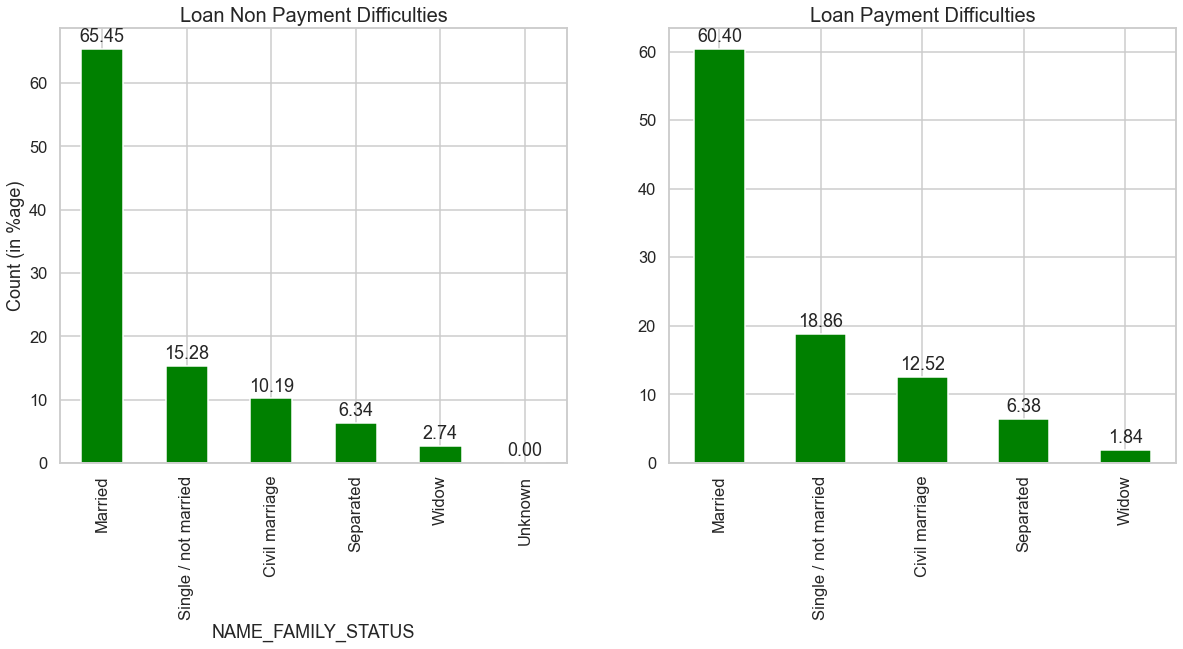

In [2918]:
# NAME_FAMILY_STATUS - Family status of the client, Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('NAME_FAMILY_STATUS')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                   
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# NAME_FAMILY_STATUS Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot) 
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **increase in the percentage of married and widowed with Loan Non Payment Difficulties** 
- **increase in the the percentage of single/not married and civil married with Loan Payment Difficulties** 



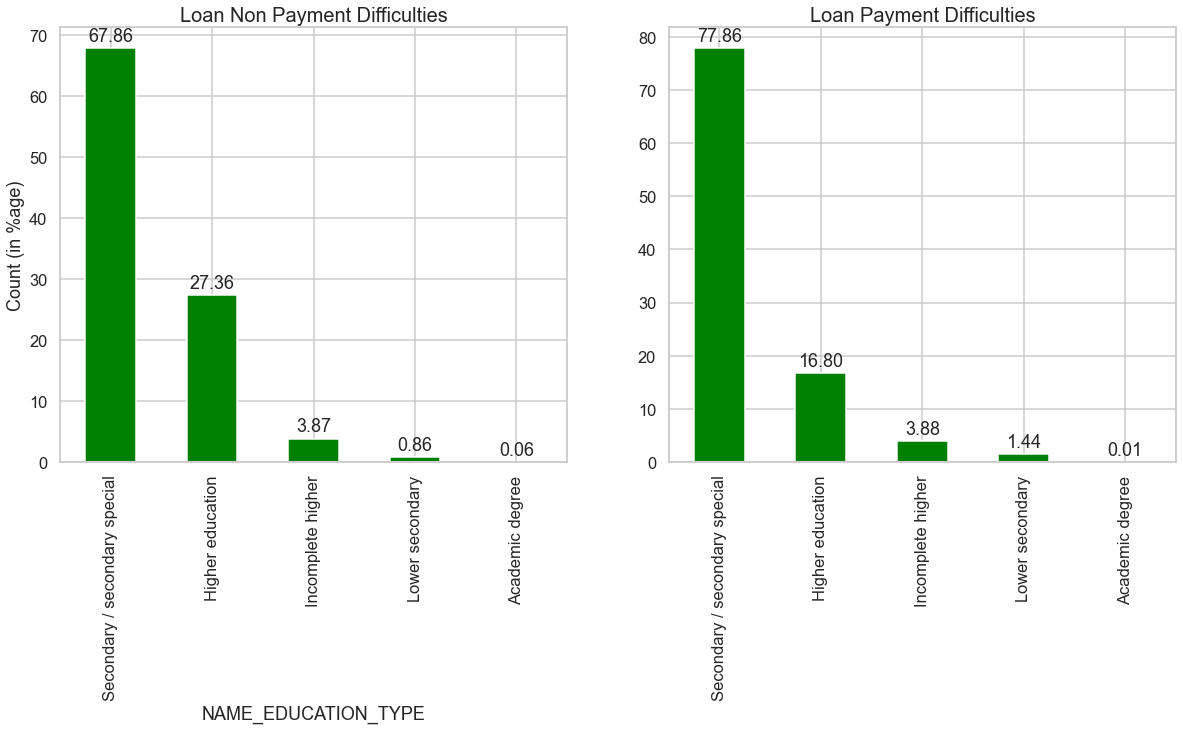

In [2919]:
# NAME_EDUCATION_TYPE - Level of highest education the client achieved, Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('NAME_EDUCATION_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                   
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# NAME_EDUCATION_TYPE Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot) 
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **increase in percentage of Loan Payment Difficulties with secondary/secondary special educational qualifications**
- **acedemic degree would face least %age of any Loan payment difficulties**




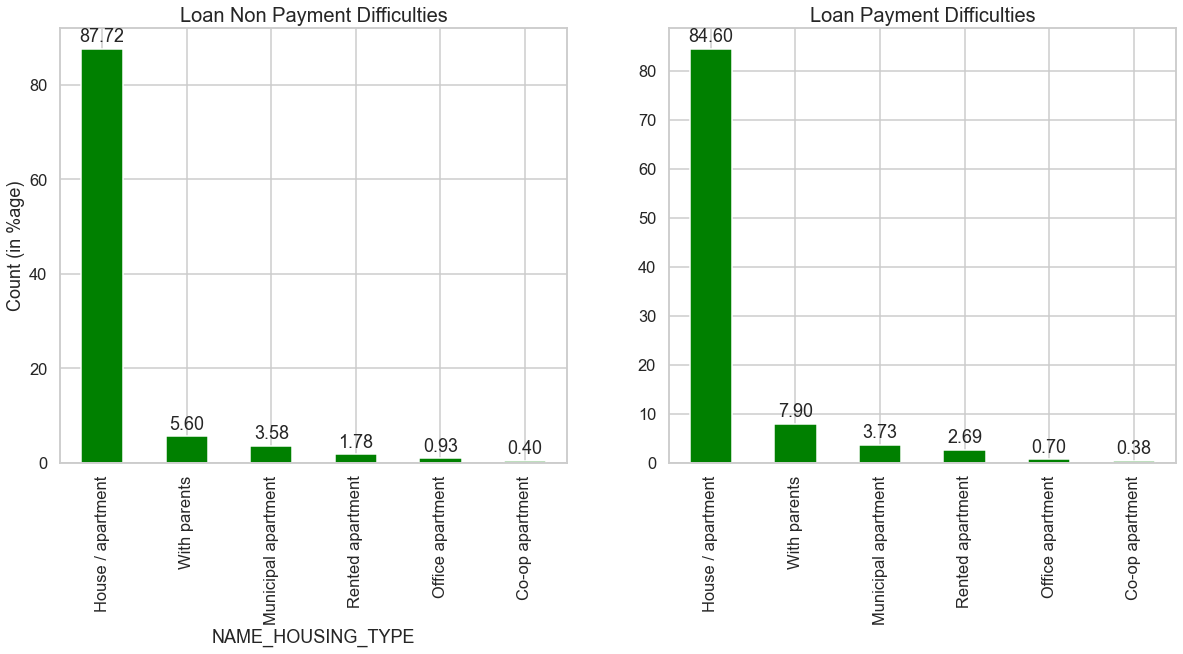

In [2920]:
# NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...), Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('NAME_HOUSING_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                   
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# NAME_HOUSING_TYPE Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot) 
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **increase in the percentage of Payment Difficulties who live with their parents, may be kids who have taken study loan or something**
- **one who have their own house/apartment are less likely to turned out to be as a loan defaulter.**
- **one with rented apartment can come up with loan payment difficulties, may be they are paying rent could be the reason**




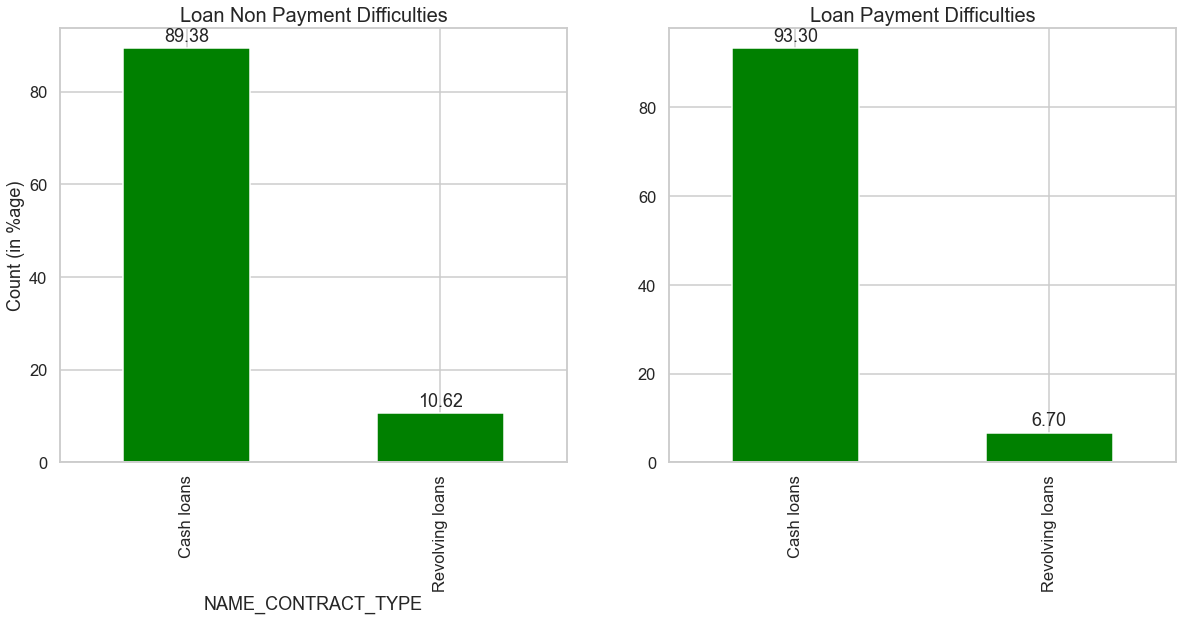

In [2921]:
# NAME_CONTRACT_TYPE - Identification if loan is cash or revolving,  Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('NAME_CONTRACT_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# NAME_CONTRACT_TYPE Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **Looks like 'Cash loans' are preferred over 'Revolving loans'**
- **Low %age of defaulter's in case of 'Revolving loans'**




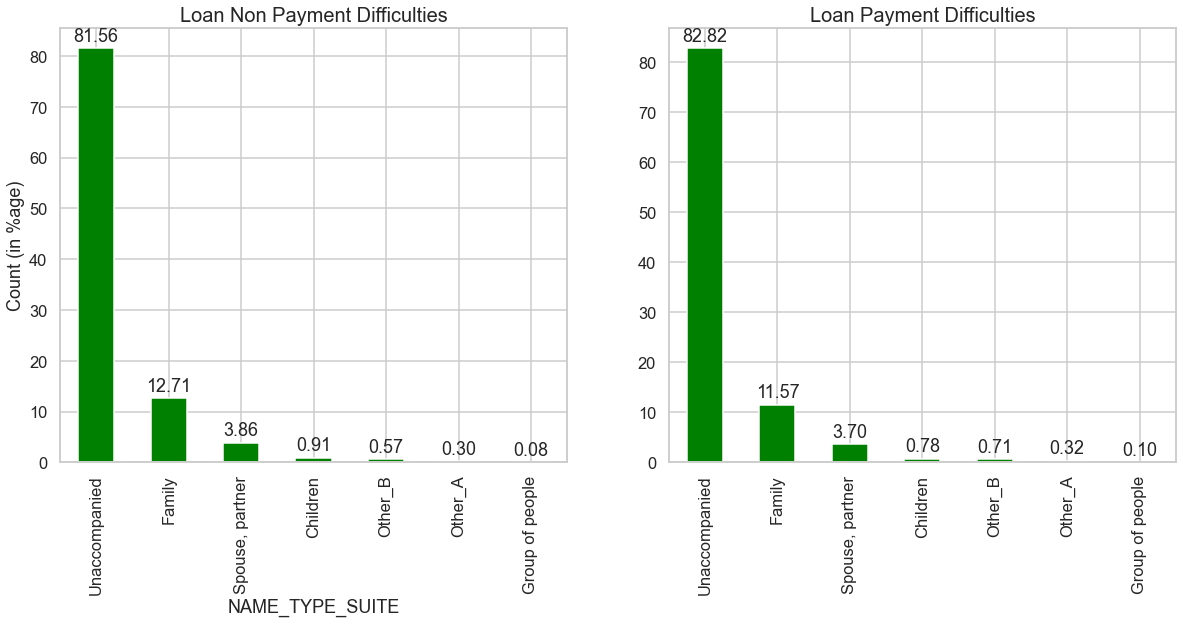

In [2922]:
# NAME_TYPE_SUITE - Who accompanied client when applying for the previous application,  Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('NAME_TYPE_SUITE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_TYPE_SUITE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# NAME_TYPE_SUITE Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["NAME_TYPE_SUITE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **No as such any major trend**




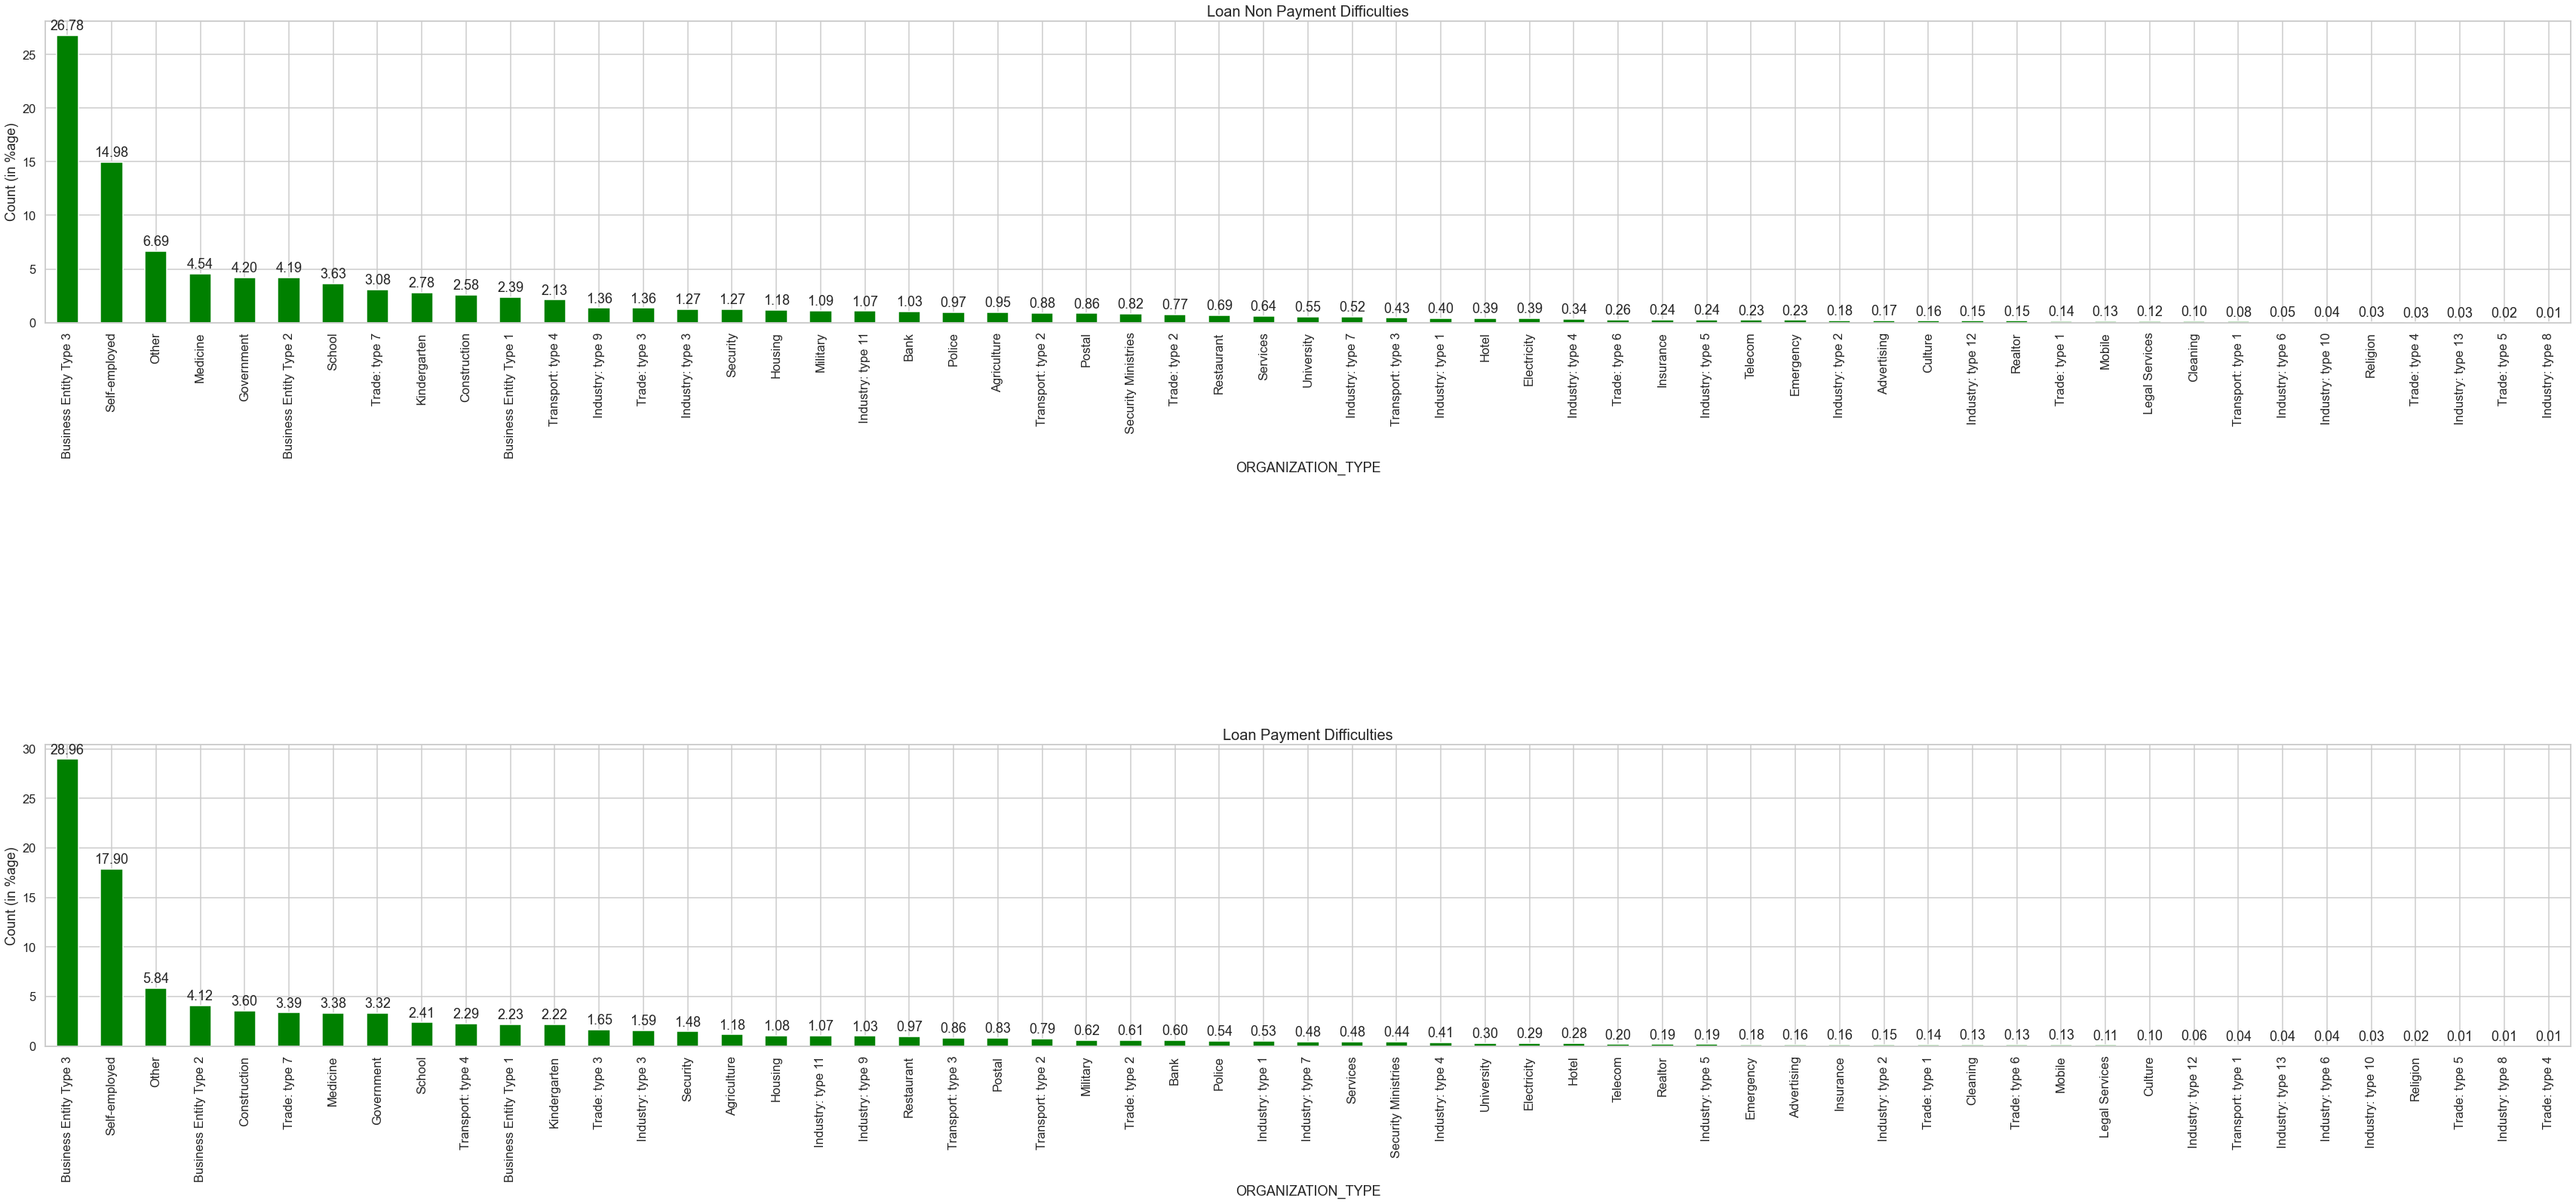

In [2923]:
# ORGANIZATION_TYPE - which organization client is working,  Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[60,25])
plt.subplot(3,1,1)

plt.ylabel('Count (in %age)')
plt.xlabel('ORGANIZATION_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["ORGANIZATION_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(3,1,3)
                                                                  
    
    
# ORGANIZATION_TYPE Distibution with Loan Payment Difficulties
plt.ylabel('Count (in %age)')
plt.xlabel('ORGANIZATION_TYPE')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["ORGANIZATION_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **No as such any major trend**
- **But Business Entity type 3 and self-employed looks like there is a possiblity that they can turned out to be defaulters**




In [2924]:
# We can see the boxplot plotted for AMT_CREDIT above which certainly has couple of outliers, let's bin the AMT_INCOME_TOTAL 
inp0['AMT_INCOME_BINS'] = pd.qcut(inp0['AMT_INCOME_TOTAL'], q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])

In [2925]:
# We can see the boxplot plotted for AMT_CREDIT above which certainly has couple of outliers, let's bin the AMT_CREDIT
inp0['AMT_CREDIT_BINS'] = pd.qcut(inp0['AMT_CREDIT'], q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])

In [2926]:
# We can see the boxplot plotted for YEARS_BIRTH above which certainly has no outliers, let's bin the YEARS_BIRTH
inp0['YEARS_BIRTH_BINS']=pd.cut(inp0['YEARS_BIRTH'], bins=[18,25,35,60,100], labels=['<18','25-35', '35-60', '60+'])

In [2927]:
inp0_target0 = inp0.loc[inp0.TARGET == 0]
inp0_target1 = inp0.loc[inp0.TARGET == 1]

In [2928]:
inp0_target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  DAYS_ID_PUBLISH  \
1           45               3                   3              291   
2           52               0                  11             2531   
3           52               8                  26             2437   
4           54               8                  11             3458   
5           46               4                  13              477   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
1      Core staff              2.0                     MONDAY   
2        Laborers              1.0                     MONDAY   
3        Laborers              2.0                  WEDNESDAY   
4      Core staff              1.0                   THURSDAY   
5        Laborers              2.0                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
1                  School      0.622246           NaN   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442           NaN   
4                Religion      0.322738           NaN   
5                   Other

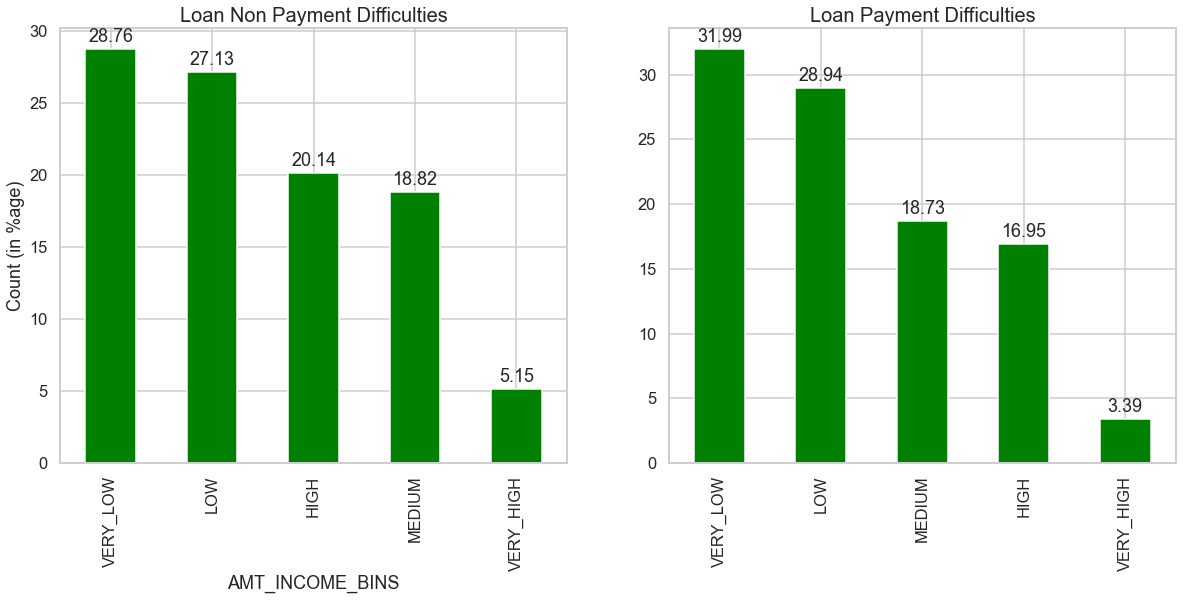

In [2929]:
# AMT_INCOME_BINS Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('AMT_INCOME_BINS')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["AMT_INCOME_BINS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# AMT_INCOME_BINS Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["AMT_INCOME_BINS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **Client with VERY_LOW and LOW income are highly likely to have Loan Payment Difficulties**
- **Client with VERY_HIGH income would face least Loan Payment Difficulties**




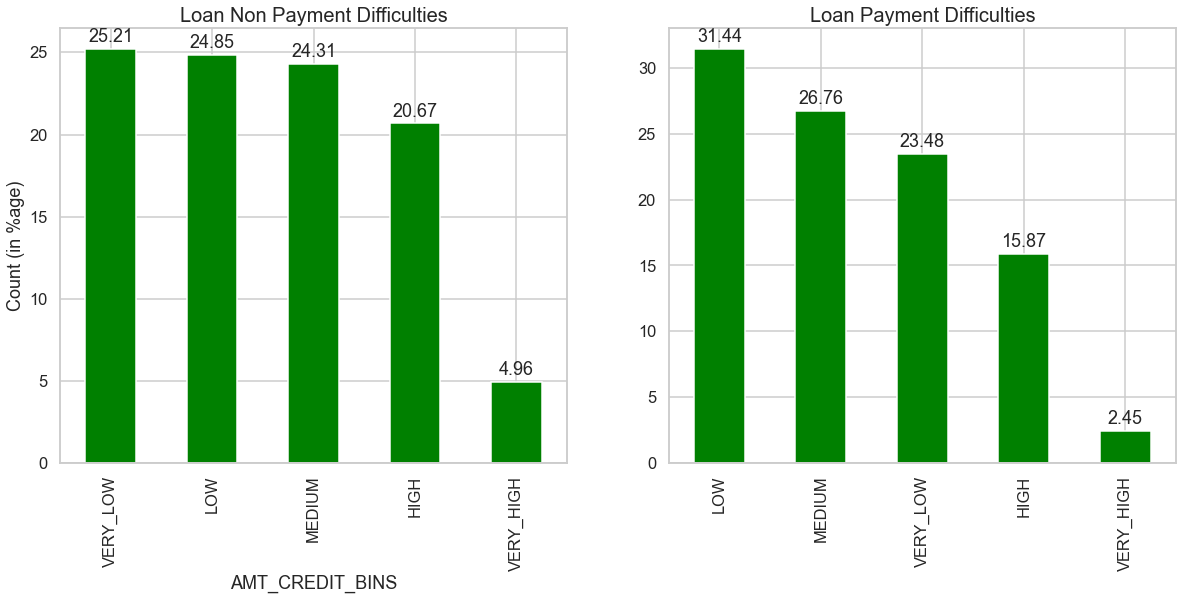

In [2930]:
# AMT_CREDIT_BINS Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('AMT_CREDIT_BINS')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["AMT_CREDIT_BINS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# AMT_CREDIT_BINS Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["AMT_CREDIT_BINS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **With LOW and MEDIUM AMT_CREDIT, there exits a high possibility with Loan Payment Difficulties.**
- **With HIGH AND VERY_HIGH LOAN AMT_CREDIT, there exits a least possibility with Loan Payment Difficulties.**




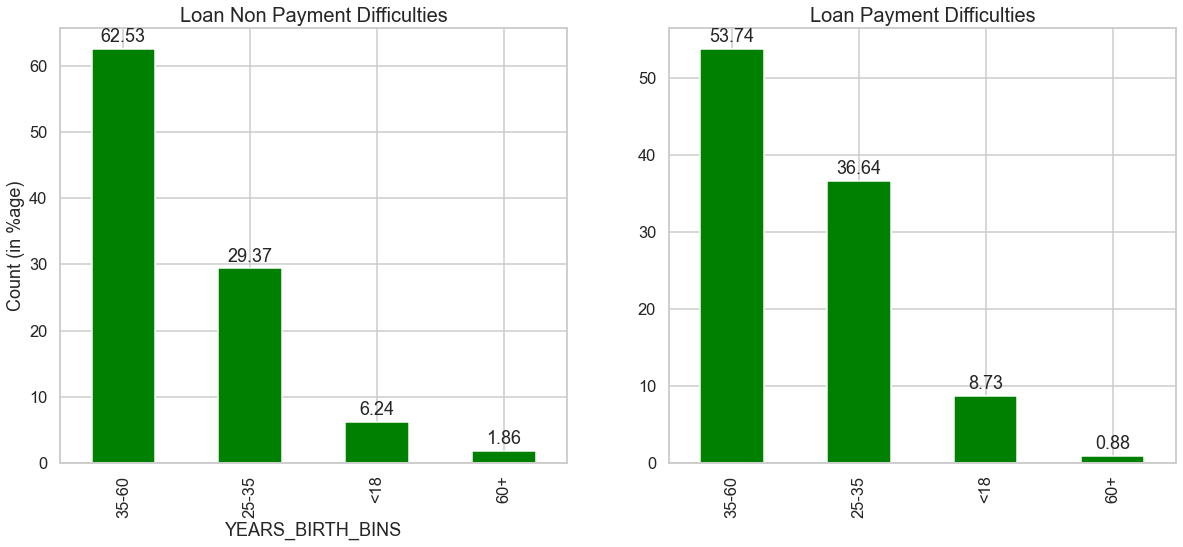

In [2931]:
# YEARS_BIRTH_BINS Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('YEARS_BIRTH_BINS')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["YEARS_BIRTH_BINS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(1,2,2)
                                                                  
    
    
# YEARS_BIRTH_BINS Distibution with Loan Payment Difficulties
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target1["YEARS_BIRTH_BINS"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)
plt.show()  


**Few points can be concluded from the graph above.**

 		
- **One with age between 35-60 has low possibility of having Loan Payment Difficulties, maybe they earns pretty handsome salary as per the experience.**
- **One with age between 25-35 has high possibility of having Loan Payment Difficulties, maybe due to non-competetive salary**
- **One with age group below 18 can turn out to be loan defaulters because they are students without any source of income.**




### Bivariate Analysis Categorical vs Numerical Variables

In [2932]:
#groupby the NAME_EDUCATION_TYPE to find the mean of the AMT_CREDIT
print(inp0_target0.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].mean().reset_index())
print()
print(inp0_target1.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].mean().reset_index())

             NAME_EDUCATION_TYPE     AMT_CREDIT
0                Academic degree  739043.400000
1               Higher education  699283.946286
2              Incomplete higher  569341.632506
3                Lower secondary  531965.108519
4  Secondary / secondary special  586760.467745

             NAME_EDUCATION_TYPE     AMT_CREDIT
0                Academic degree  950245.500000
1               Higher education  644417.292314
2              Incomplete higher  536636.027123
3                Lower secondary  475438.600000
4  Secondary / secondary special  541512.874853


In [2933]:
#groupby the NAME_EDUCATION_TYPE to find the median of the AMT_CREDIT
print(inp0_target0.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].median().reset_index())
print()
print(inp0_target1.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].median().reset_index())

             NAME_EDUCATION_TYPE  AMT_CREDIT
0                Academic degree    607500.0
1               Higher education    585000.0
2              Incomplete higher    469152.0
3                Lower secondary    454500.0
4  Secondary / secondary special    508495.5

             NAME_EDUCATION_TYPE  AMT_CREDIT
0                Academic degree    790830.0
1               Higher education    545040.0
2              Incomplete higher    450000.0
3                Lower secondary    450000.0
4  Secondary / secondary special    484789.5


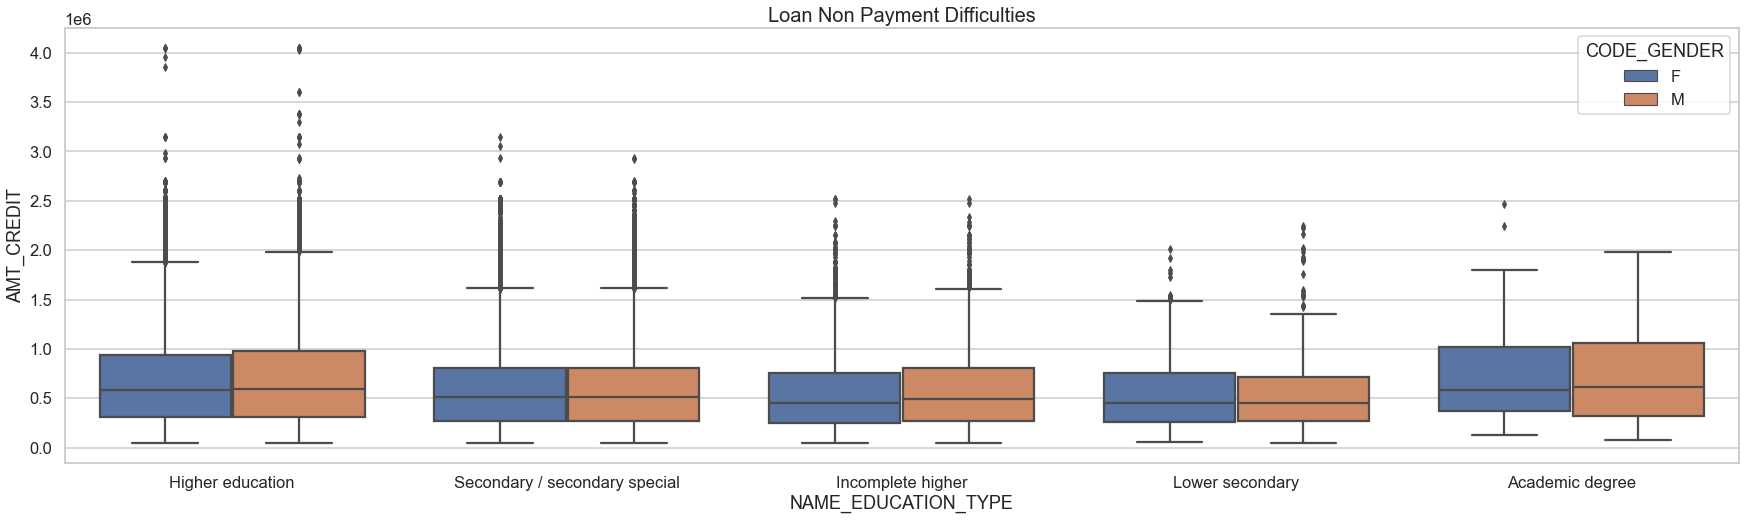

In [2934]:
# NAME_EDUCATION_TYPE v/s AMT_CREDIT v/s CODE_GENDER for Loan - Non Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="CODE_GENDER")
plt.show()

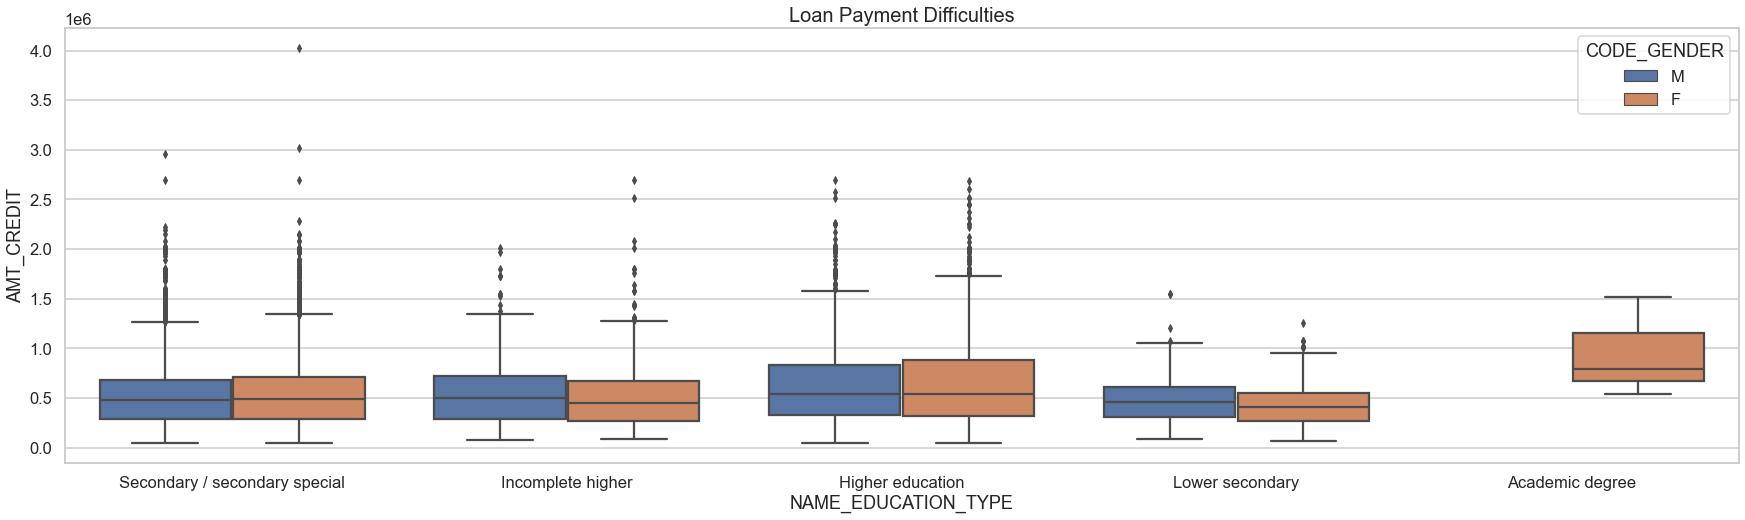

In [2935]:
# NAME_EDUCATION_TYPE v/s AMT_CREDIT v/s CODE_GENDER  for Loan Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="CODE_GENDER")
plt.show()

**Few points can be concluded from the graph above.**

 		
- **NAME_EDUCATION_TYPE = Academic degree and Higher education for both the genders are having higher number of AMT_CREDIT as compared to others in graph with Loan Non Payment Difficulties**




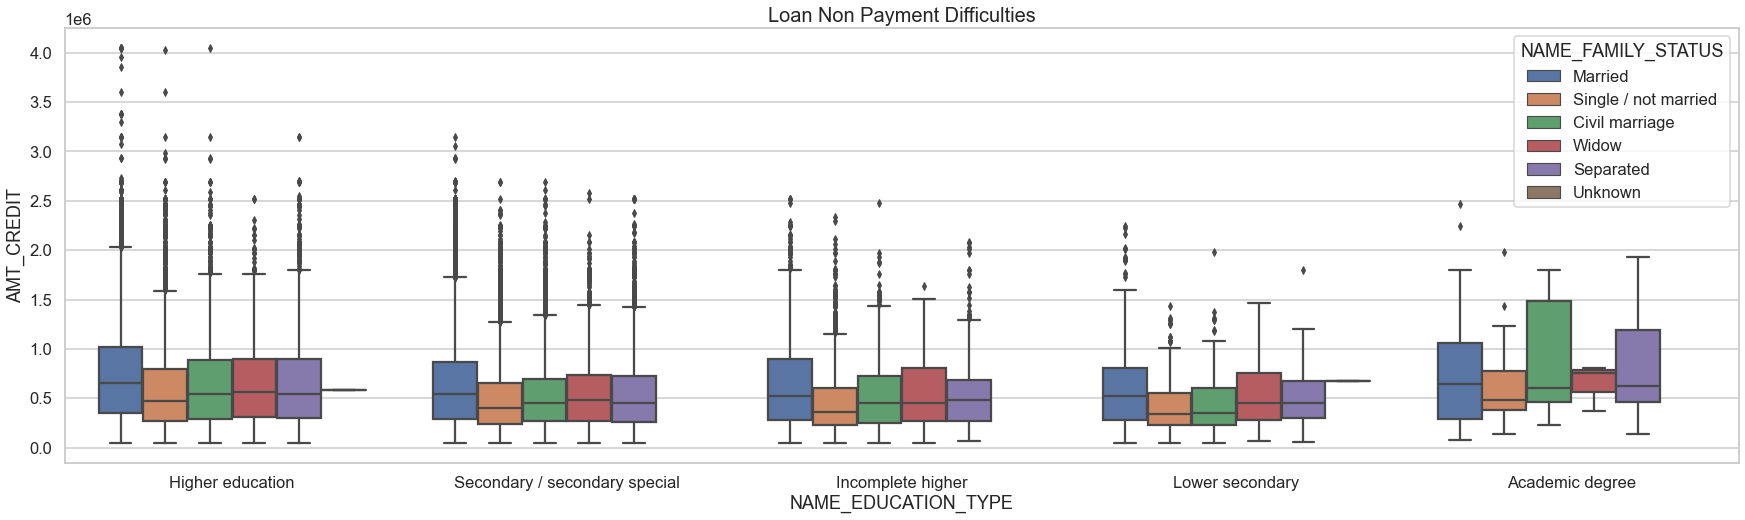

In [2936]:
# NAME_EDUCATION_TYPE v/s AMT_CREDIT v/s NAME_FAMILY_STATUS for Loan - Non Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="NAME_FAMILY_STATUS")
plt.show()

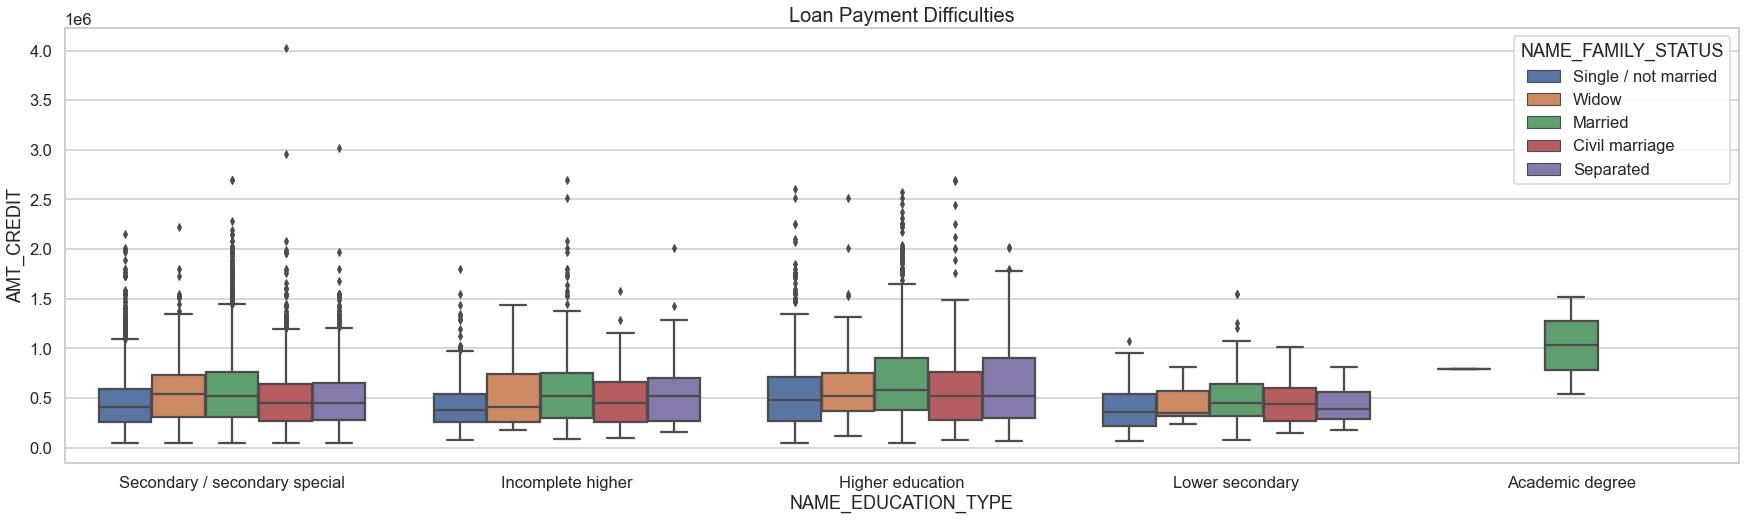

In [2937]:
# NAME_EDUCATION_TYPE v/s AMT_CREDIT v/s NAME_FAMILY_STATUS  for Loan Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", hue="NAME_FAMILY_STATUS")
plt.show()

**Few points can be concluded from the graph above.**

 		
- **NAME_FAMILY_STATUS = Civil marriage, Married  and Separated of Academic degree education are having higher number of AMT_CREDIT as compared to others in graph with Loan Non Payment Difficulties**
- **Most of the outliers are from NAME_EDUCATION_TYPE = Secondary/secondary special and Higher education from graph with Loan Non Payment Difficulties**




In [2938]:
#groupby the AMT_INCOME_BINS to find the median of the AMT_CREDIT, due to outliers median is a good idea
print(inp0_target0.groupby('AMT_INCOME_BINS')['AMT_CREDIT'].median().reset_index())
print()
print(inp0_target1.groupby('AMT_INCOME_BINS')['AMT_CREDIT'].median().reset_index())

  AMT_INCOME_BINS  AMT_CREDIT
0        VERY_LOW    315000.0
1             LOW    495000.0
2          MEDIUM    592560.0
3            HIGH    728460.0
4       VERY_HIGH    900000.0

  AMT_INCOME_BINS  AMT_CREDIT
0        VERY_LOW   343377.00
1             LOW   479886.75
2          MEDIUM   545040.00
3            HIGH   640080.00
4       VERY_HIGH   781920.00


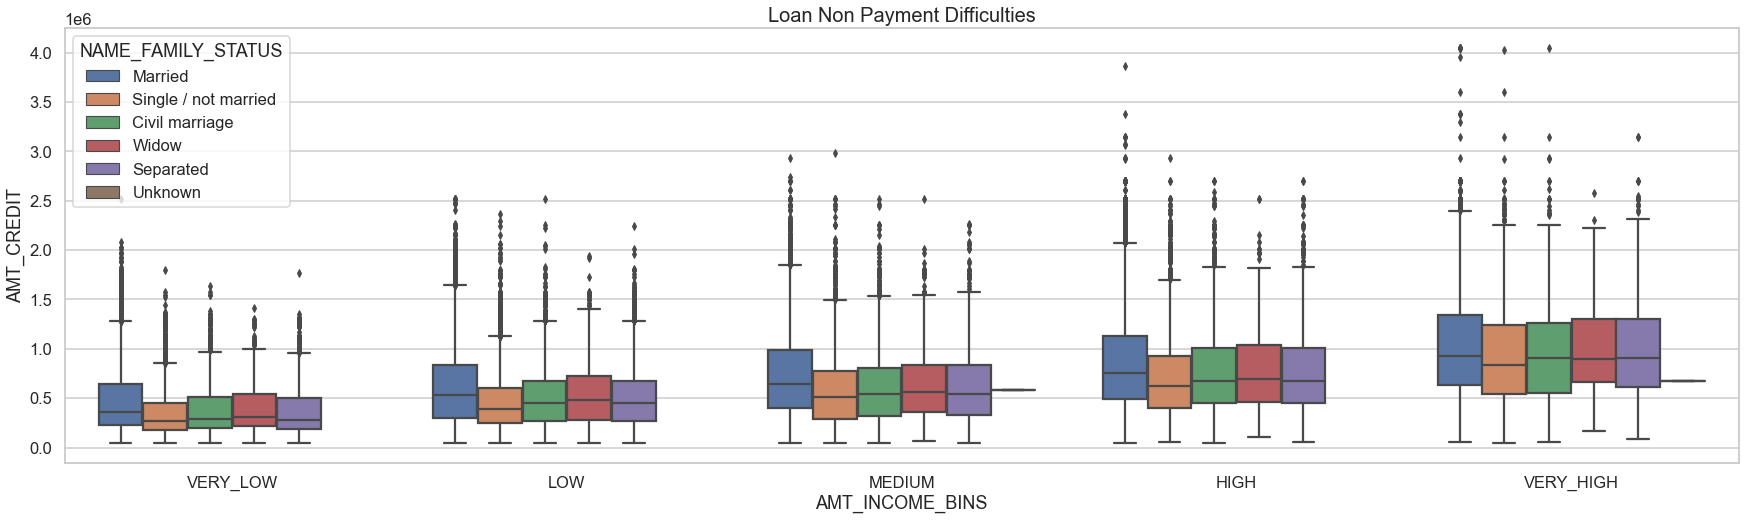

In [2939]:
# AMT_INCOME_BINS v/s AMT_CREDIT v/s NAME_FAMILY_STATUS for Loan - Non Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('AMT_INCOME_BINS')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target0, x="AMT_INCOME_BINS", y="AMT_CREDIT", hue="NAME_FAMILY_STATUS")
plt.show()

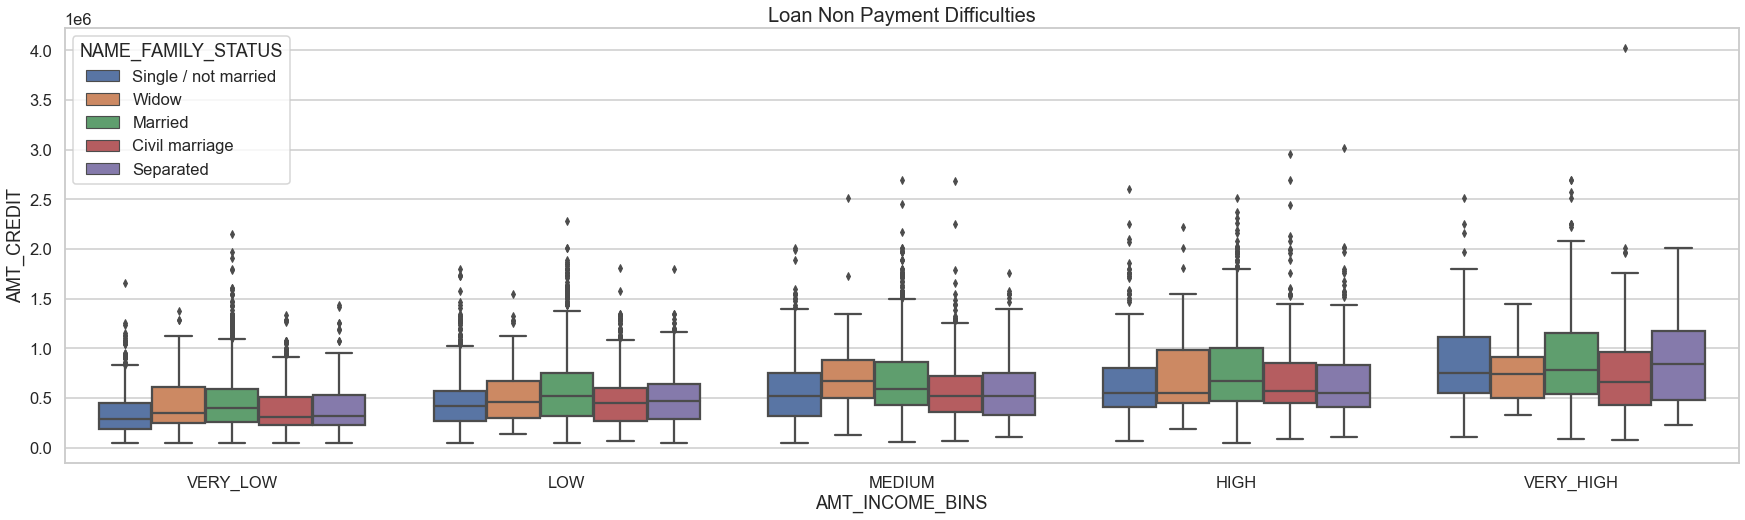

In [2940]:
# AMT_INCOME_BINS v/s AMT_CREDIT v/s NAME_FAMILY_STATUS for Loan Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('AMT_INCOME_BINS')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target1, x="AMT_INCOME_BINS", y="AMT_CREDIT", hue="NAME_FAMILY_STATUS")
plt.show()

**Few points can be concluded from the graph above.**

 		
- **AMT_INCOME_BINS for VERY_HIGH, they have large amount of AMT_CREDIT for NAME_FAMILY_STATUS = Single/not married, Married, Civil Marrigae and Seperated**




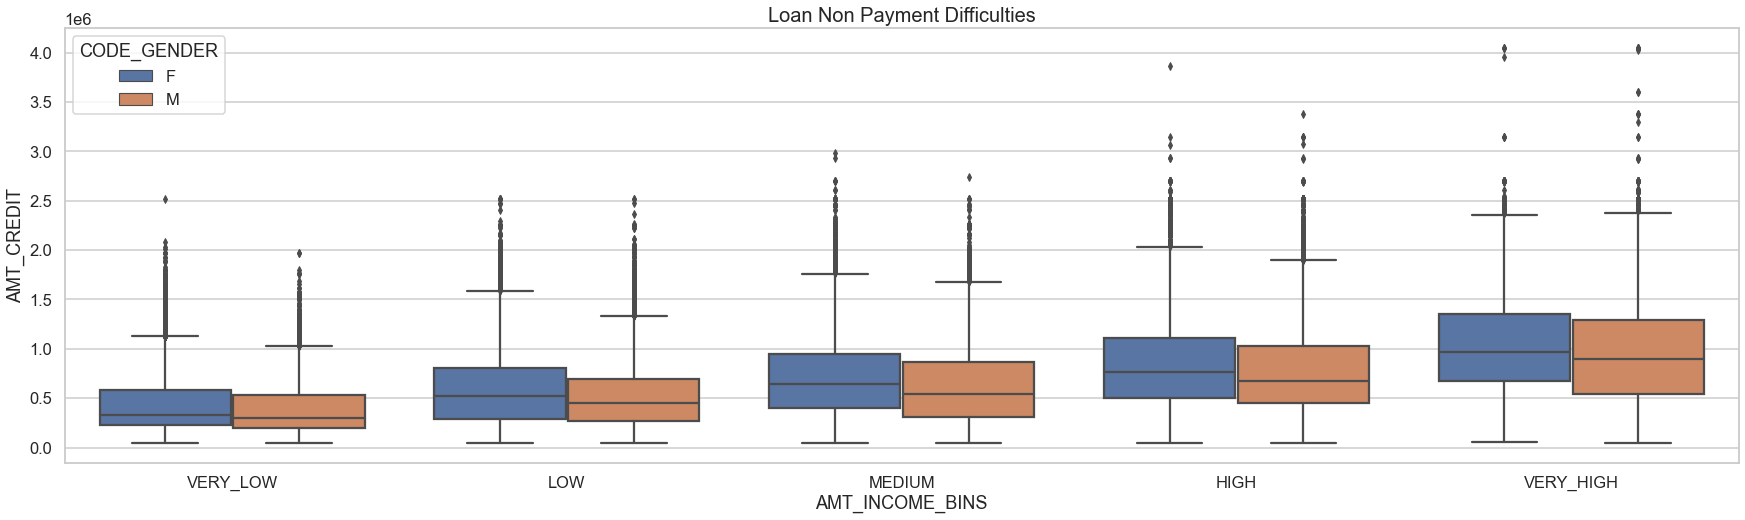

In [2941]:
# AMT_INCOME_BINS v/s AMT_CREDIT v/s CODE_GENDER for Loan - Non Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('AMT_INCOME_BINS')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target0, x="AMT_INCOME_BINS", y="AMT_CREDIT", hue="CODE_GENDER")
plt.show()

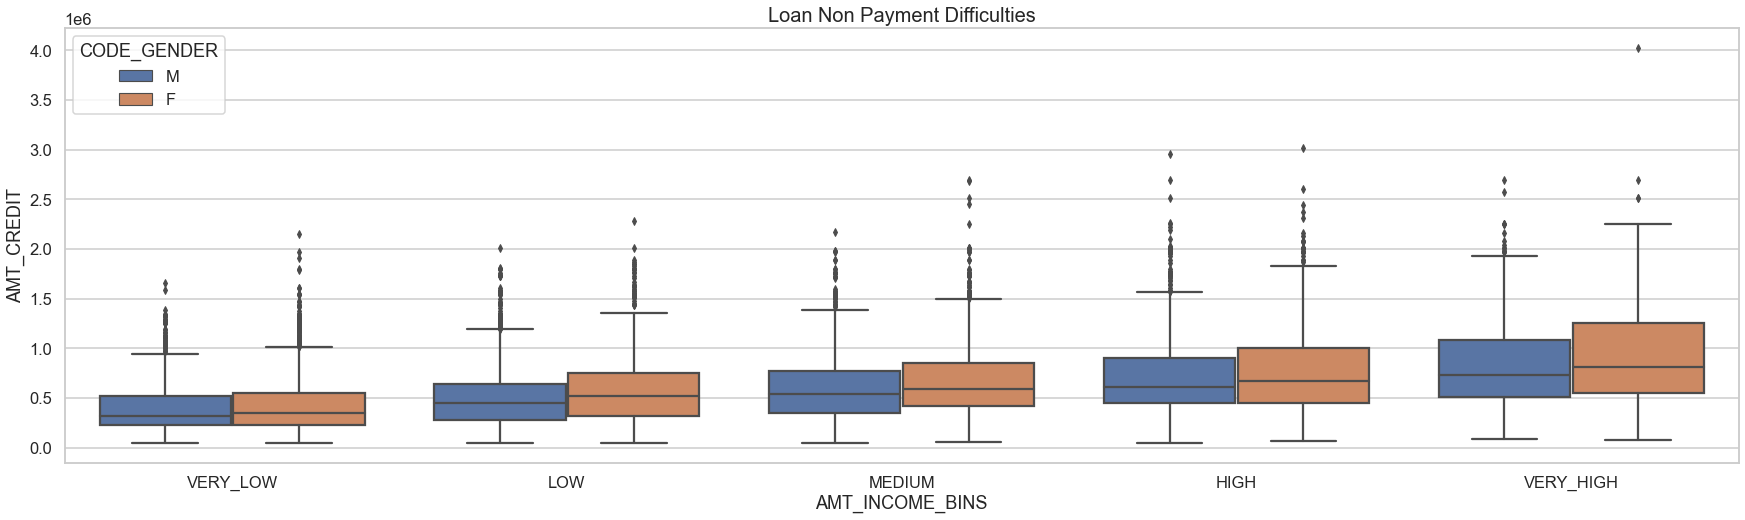

In [2942]:
# AMT_INCOME_BINS v/s AMT_CREDIT v/s CODE_GENDER for Loan Payment Difficulties
plt.figure(figsize = [30,8])
plt.ylabel('AMT_CREDIT')
plt.xlabel('AMT_INCOME_BINS')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = sns.boxplot(data = inp0_target1, x="AMT_INCOME_BINS", y="AMT_CREDIT", hue="CODE_GENDER")
plt.show()

**Few points can be concluded from the graph above.**

 		
- **AMT_INCOME_BINS for VERY_HIGH, they have large amount of AMT_CREDIT for both of the gender**




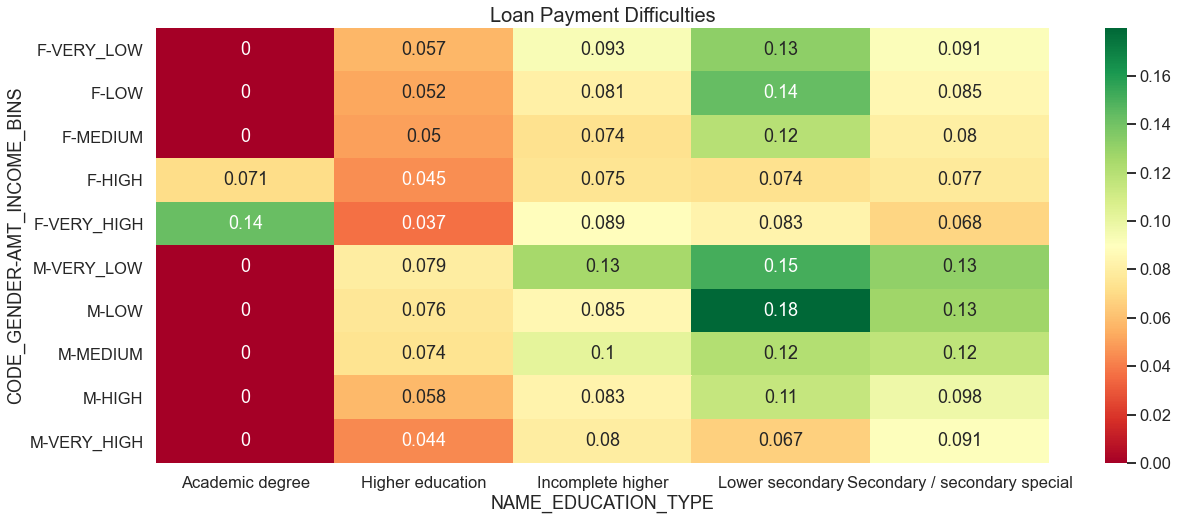

In [2943]:

plt.figure(figsize = [20,8])
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
gender_income_edu = pd.pivot_table(inp0, values='TARGET', index=['CODE_GENDER','AMT_INCOME_BINS'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(gender_income_edu, annot = True, cmap = 'RdYlGn')
plt.show()

**Few points can be concluded from the graph above.**

 		
- **CODE_GENDER = F with NAME_EDUCATION_TYPE = Academic degree and AMT_INCOME_BINS = VERY_HIGH, they have least %age of Loan Payment difficulties**
- **On the other hand, CODE_GENDER = M with NAME_EDUCATION_TYPE = Lowe secondary and AMT_INCOME_BINS = Medium have high changes of loan Payment difficulties**
- **NAME_EDUCATION_TYPE = Higher education have high %age of Loan Payment difficulties for both gender**



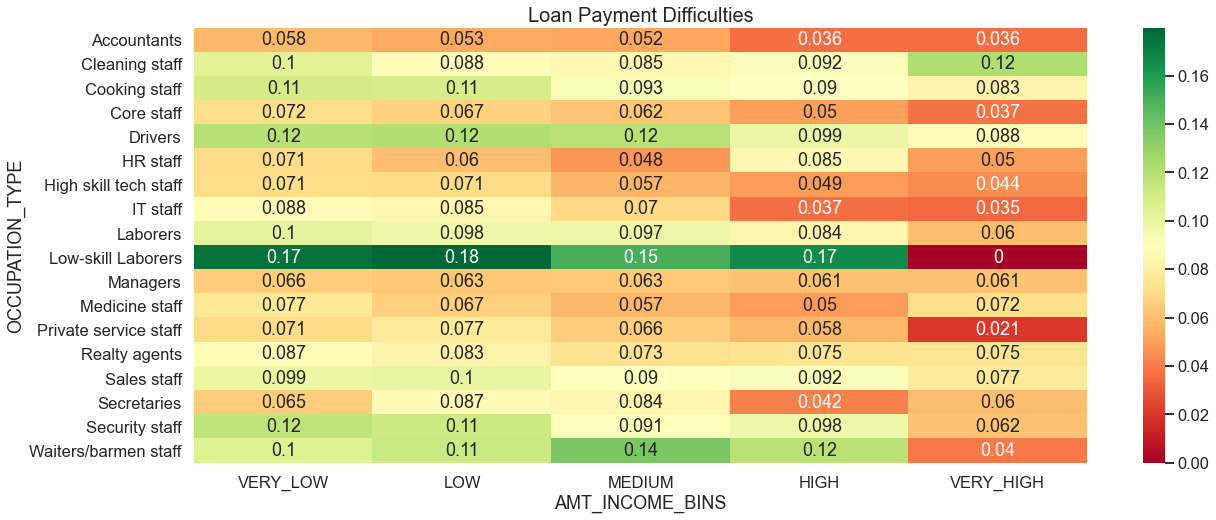

In [2944]:

plt.figure(figsize = [20,8])
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
occup_income = pd.pivot_table(inp0, values='TARGET', index=['OCCUPATION_TYPE'],columns=['AMT_INCOME_BINS'], aggfunc=np.mean)
sns.heatmap(occup_income, annot = True, cmap = 'RdYlGn')
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Low skill laborers have the highest probality to face Loan payment difficulties**



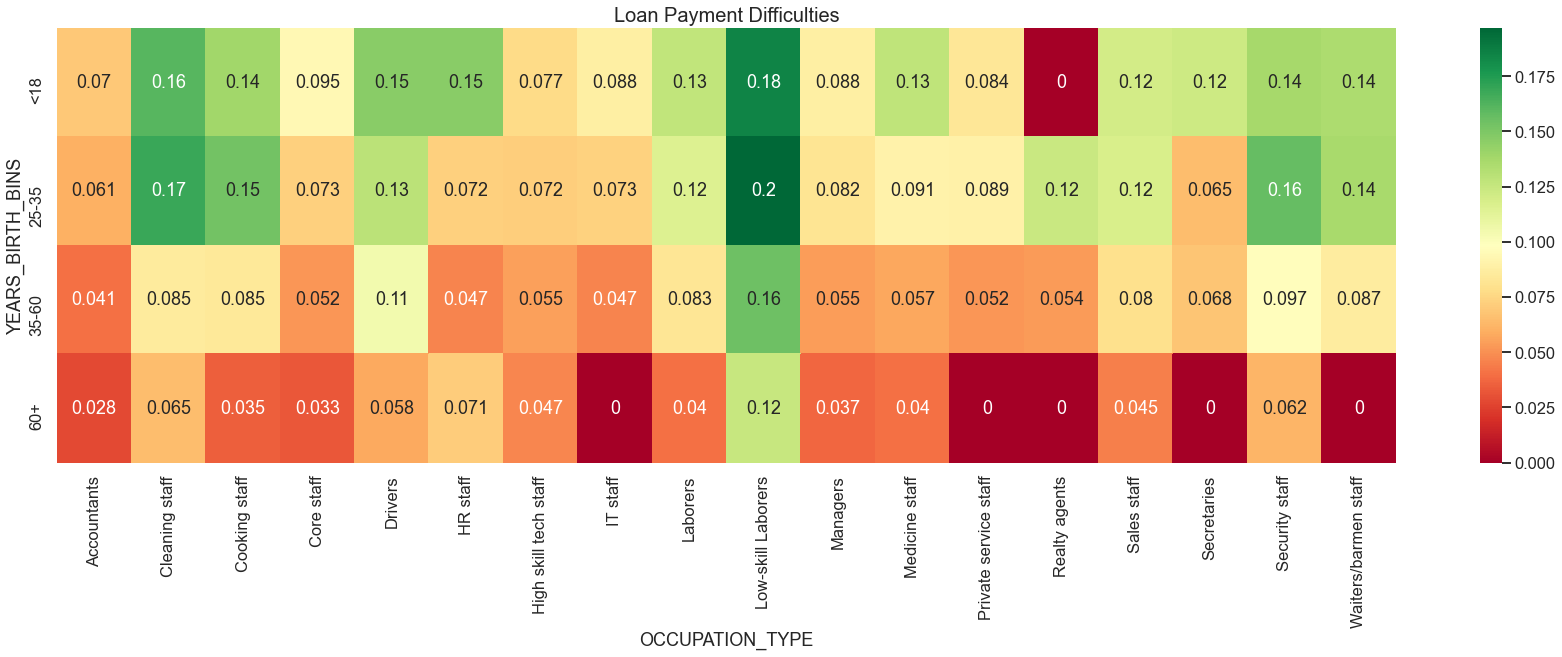

In [2945]:
plt.figure(figsize = [30,8])
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
occup_age = pd.pivot_table(inp0, values='TARGET', index=['YEARS_BIRTH_BINS'],columns=['OCCUPATION_TYPE'], aggfunc=np.mean)
sns.heatmap(occup_age, annot = True, cmap = 'RdYlGn')
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Low skill laborers Irrespective of age have the highest probality to face Loan payment difficulties**
- **35-60 and 60+ has less possibility of to become a defaulter**



### Bivariate Analysis of Numerical vs Numerical Variables

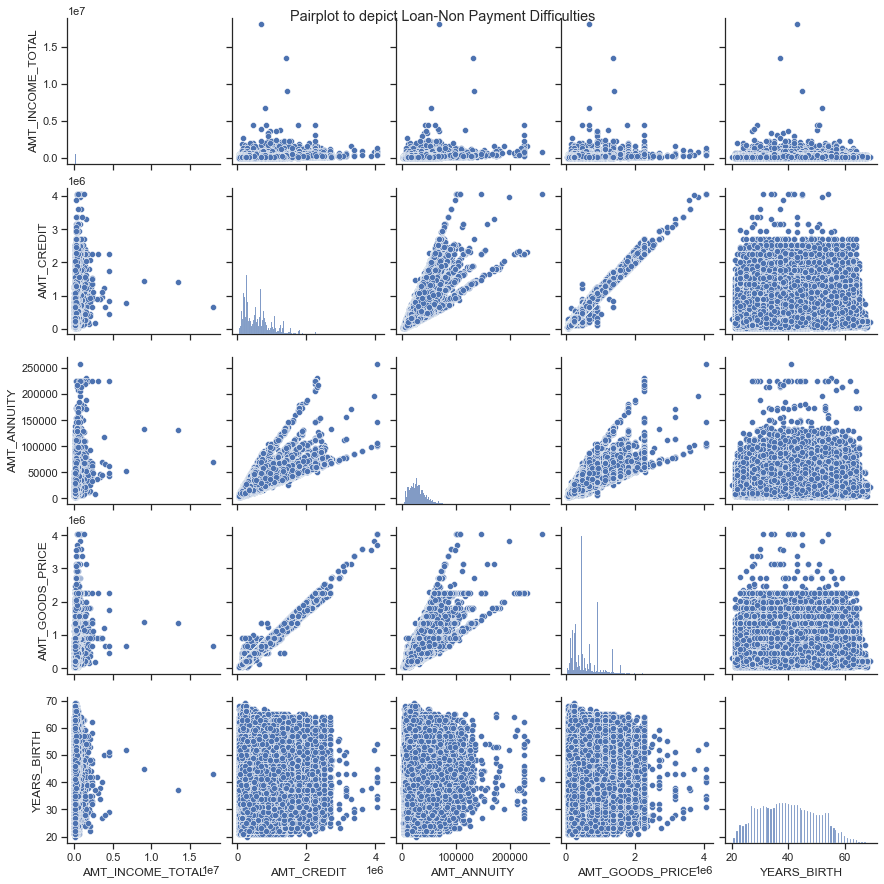

In [2946]:
#Pairplot for 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEAR_BIRTH' for Loan-Non Payment Difficulties
sns.set(style="ticks", color_codes=True)
plot = sns.pairplot(data = inp0_target0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']],  aspect=1)
plot.fig.suptitle('Pairplot to depict Loan-Non Payment Difficulties', fontdict={'fontsize':20} )
plt.show()

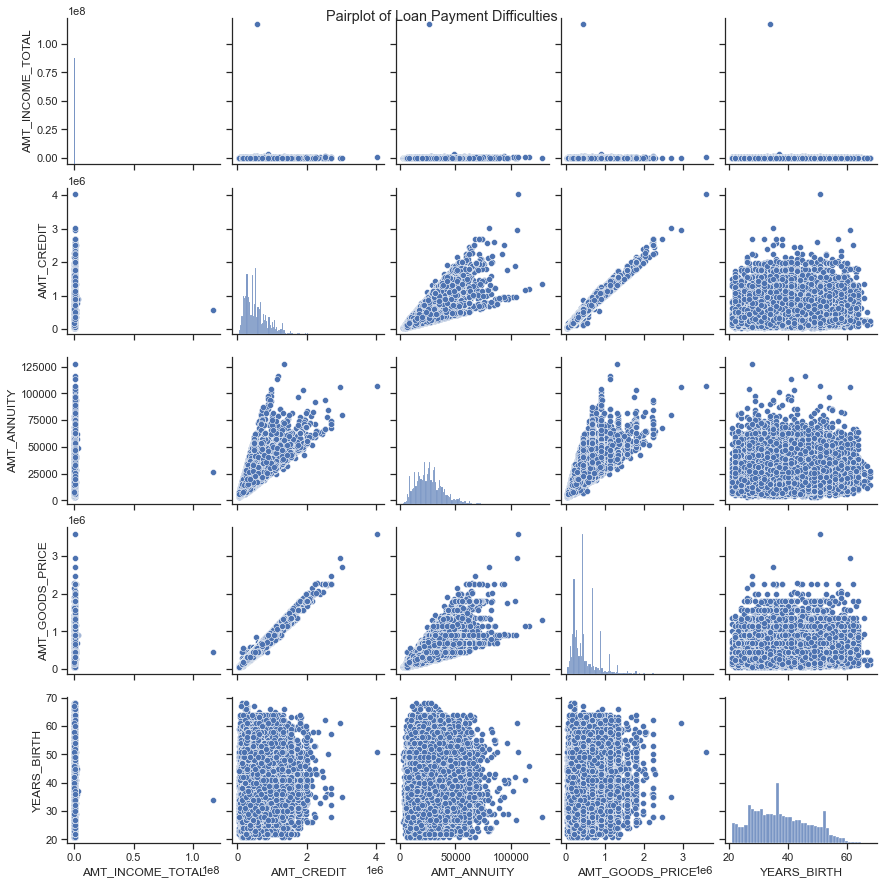

In [2947]:
#Pairplot for 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEAR_BIRTH' for Loan Payment Difficulties
plot = sns.pairplot(data = inp0_target1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH']], aspect=1)
plot.fig.suptitle('Pairplot of Loan Payment Difficulties', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **high correlation and trend between AMT_GOODS_PRICE and AMT_CREDIT**




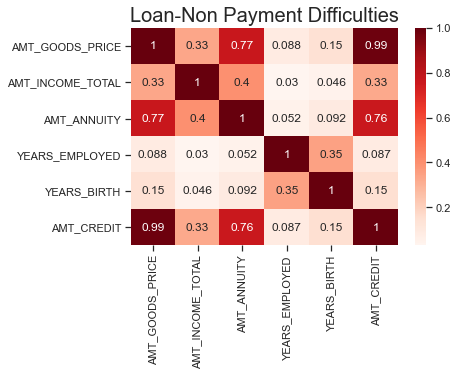

In [2948]:
# Heatmap 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH', 'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT' for Loan-Non Payment Difficulties
sns.heatmap(inp0_target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH', 'AMT_CREDIT']].corr(), annot=True, cmap='Reds')

plt.title('Loan-Non Payment Difficulties', fontdict={'fontsize':20} )

plt.show()

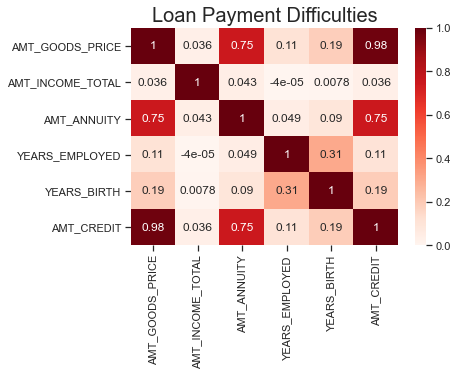

In [2949]:
# Heatmap 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH', 'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT' for Loan Payment Difficulties
sns.heatmap(inp0_target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','YEARS_BIRTH', 'AMT_CREDIT']].corr(), annot=True, cmap='Reds')

plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )

plt.show()

**Few points can be concluded from the graph above.**

 		
- **high correlation and trend between AMT_GOODS_PRICE and AMT_CREDIT**
- **There is no strong correlation between AMT_INCOME_TOTAL and AMT_CREDIT. Generally Income is the base factor for deciding the credit amount of the loan**




### Bivariate Analysis Categorical vs Categorical Variables

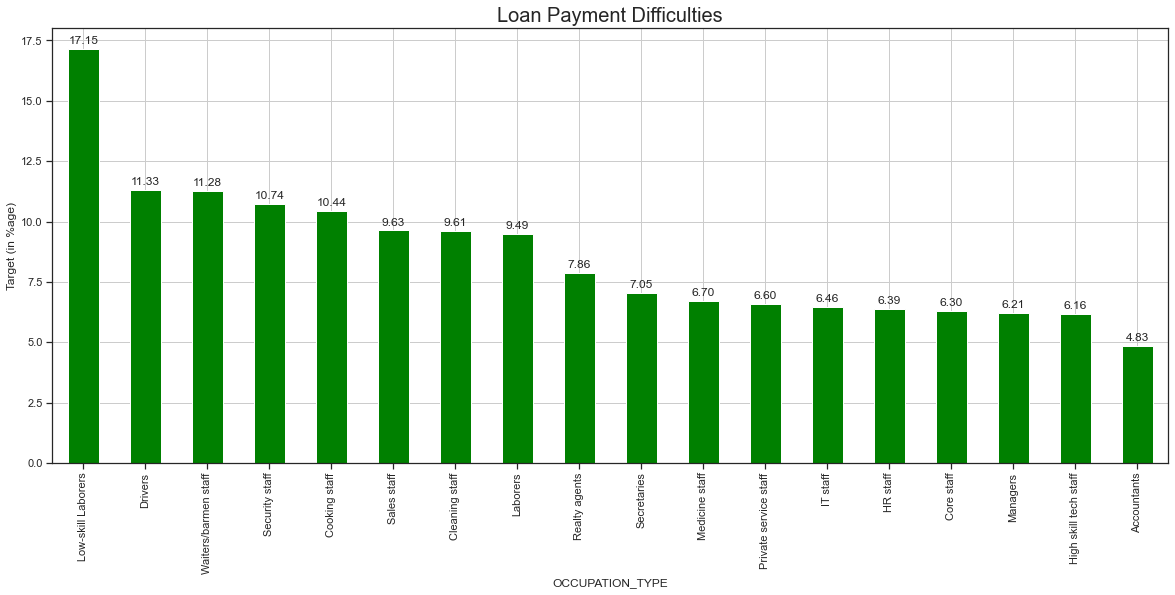

In [2950]:
# OCCUPATION_TYPE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[20,8])

plt.ylabel('Target (in %age)')
plt.xlabel('OCCUPATION_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **OCCUPATION_TYPE = Laborers has the highest percentage for loan payment difficulties**
- **Then, Drivers, Waiters/barmen stagg represents the 2nd highest for turning into defaulters**




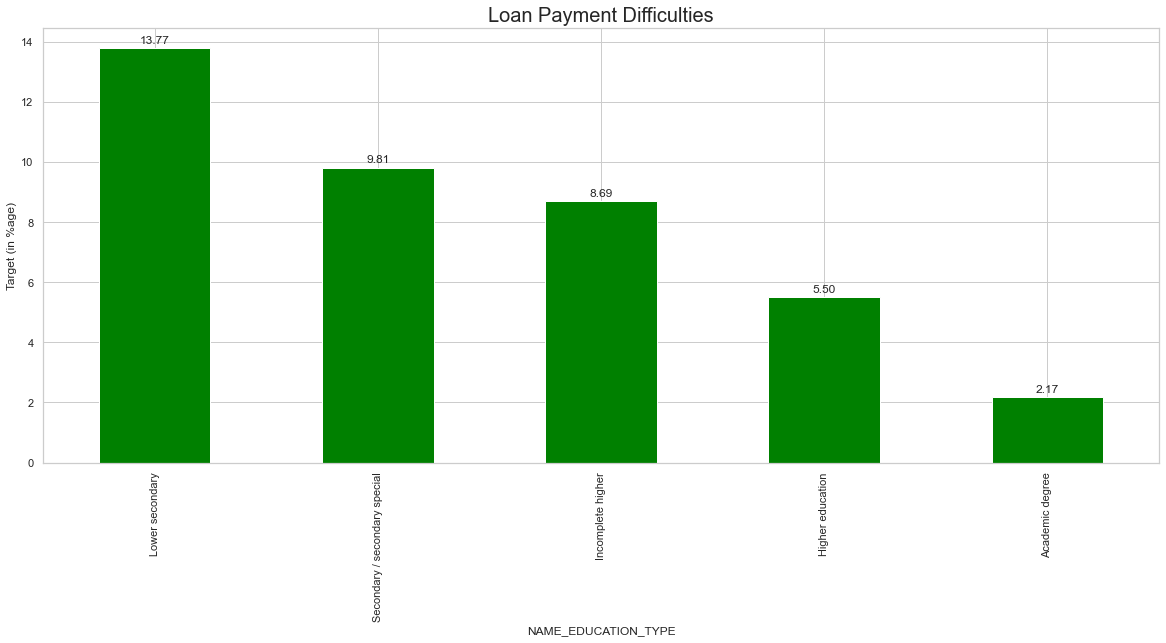

In [2951]:
# NAME_EDUCATION_TYPE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[20,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_EDUCATION_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **NAME_EDUCATION_TYPE has the highest %age of loan payment difficulties**
- **On the other hand, NAME_EDUCATION_TYPE = Academic degree has the lowest %age of loan payment difficulties**




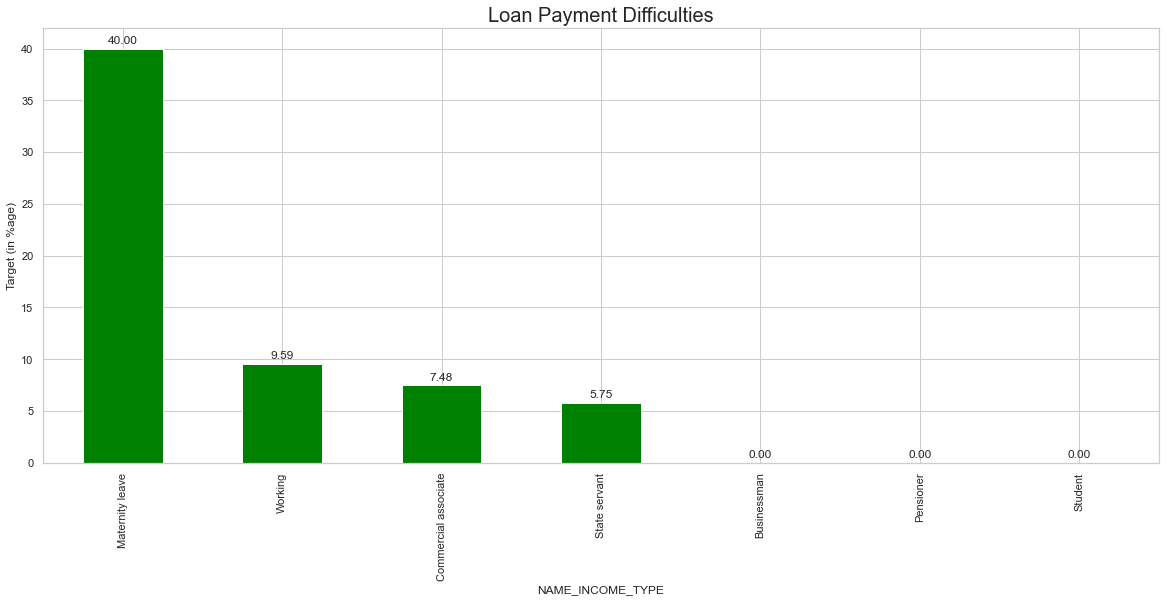

In [2952]:
# NAME_INCOME_TYPE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[20,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_INCOME_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **NAME_INCOME_TYPE = Maternity leave has the highest %age of Loan Payment Difficulties.**
- **On the other hand, NAME_INCOME_TYPE = Businessman, Pensioner and student has the lowest(almost neglible) %age of loan payment difficulties**




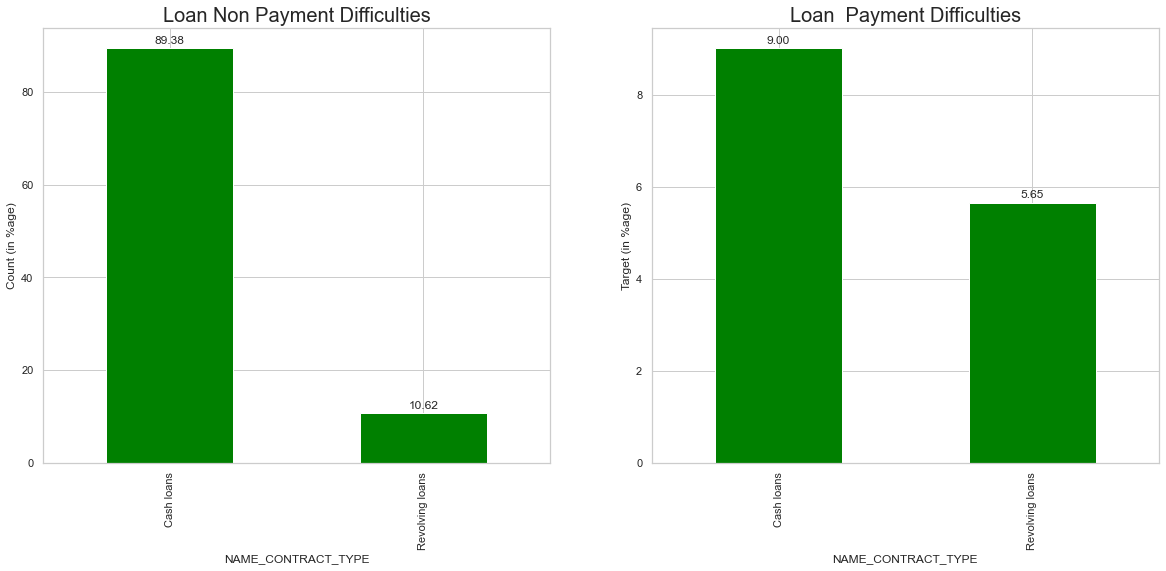

In [2953]:
# NAME_CONTRACT_TYPE v/s Target Distibution with Loan Payment Difficulties
# NAME_CONTRACT_TYPE - Identification if loan is cash or revolving,  Distibution with Loan Non Payment Difficulties
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)

plt.ylabel('Count (in %age)')
plt.xlabel('NAME_CONTRACT_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Non Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_target0["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  
                                                                  
                                                                  
plt.subplot(1,2,2)
plt.ylabel('Target (in %age)')
plt.xlabel('NAME_CONTRACT_TYPE')

sns.set_style('whitegrid')
plt.title('Loan  Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **NAME_CONTRACT_TYPE = Cash loans has the highest %age of loan payment difficulties.**
- **On the other hand, NAME_CONTRACT_TYPE = Revolving loeans has the least %age of loan payment difficulties**




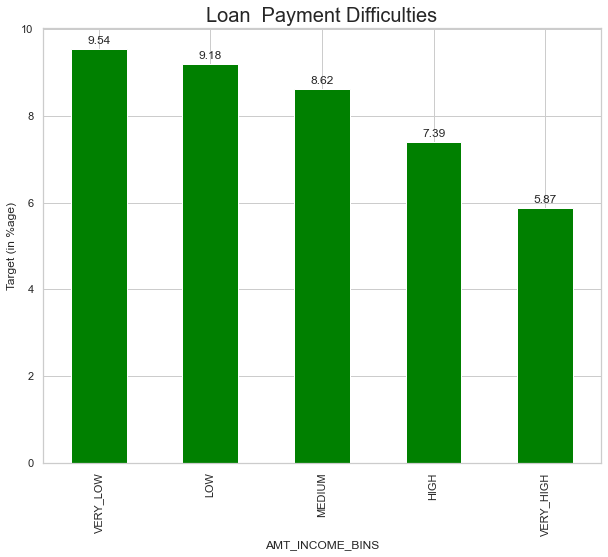

In [2954]:
# AMT_INCOME_BINS v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('AMT_INCOME_BINS')

sns.set_style('whitegrid')
plt.title('Loan  Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('AMT_INCOME_BINS')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **AMT_INCOME_BINS = VERY_LOW and LOW has the highest %age of loan payment difficulties.**
- **On the other hand, AMT_INCOME_BINS = HIGH and VERY_HIGH has the least %age of loan payment difficulties**




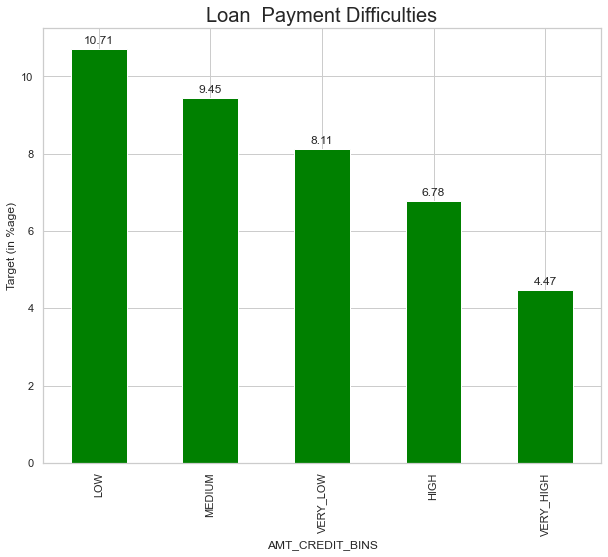

In [2955]:
# AMT_CREDIT_BINS v/s Target Distibution with Loan  Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('AMT_CREDIT_BINS')

sns.set_style('whitegrid')
plt.title('Loan  Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('AMT_CREDIT_BINS')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **AMT_CREDIT_BINS = LOW and MEDIUM has the highest %age of loan payment difficulties.**
- **On the other hand, AMT_CREDIT_BINS = HIGH and VERY_HIGH has the least %age of loan payment difficulties**




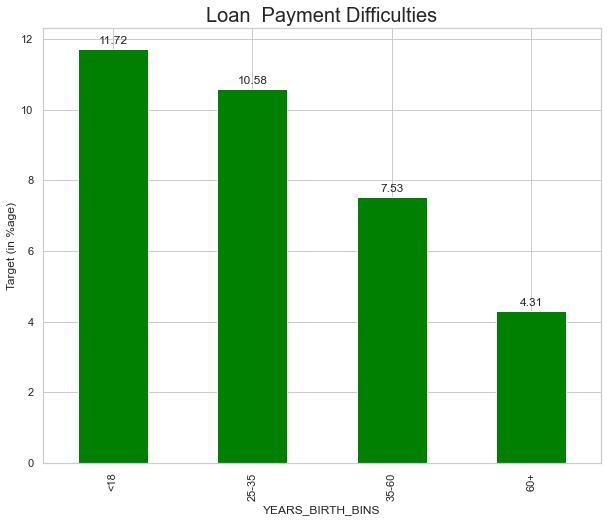

In [2956]:
# YEARS_BIRTH_BINS v/s Target Distibution with Loan  Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('YEARS_BIRTH_BINS')

sns.set_style('whitegrid')
plt.title('Loan  Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('YEARS_BIRTH_BINS')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **YEARS_BIRTH_BINS = <18 and 25-30 has the highest %age of loan payment difficulties.**
- **On the other hand, YEARS_BIRTH_BINS = 35-60 and 60+ has the least %age of loan payment difficulties**




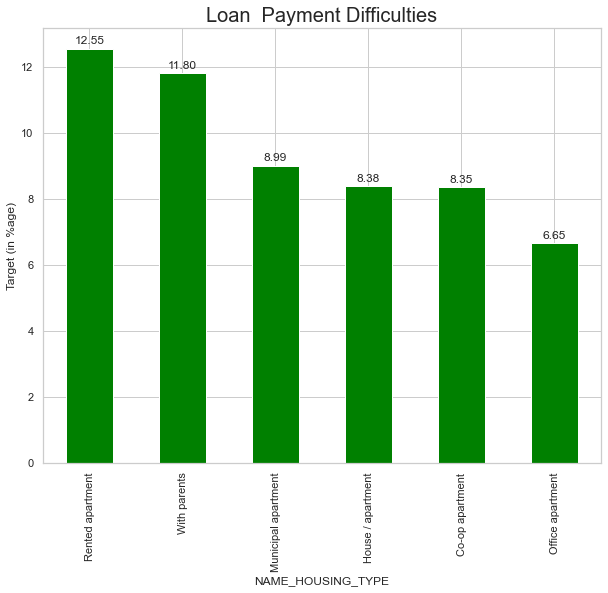

In [2957]:

# NAME_HOUSING_TYPE v/s Target Distibution with Loan  Payment Difficulties, what type of other expenditure you have
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_HOUSING_TYPE')

sns.set_style('whitegrid')
plt.title('Loan  Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


### Data Analysis - Previous Application 

In [2958]:
# loading the previous_application.csv
inp0_prev= pd.read_csv('previous_application.csv')
inp0_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [2959]:
inp0_prev.shape

(1670214, 37)

In [2960]:
inp0_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [2961]:
inp0_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Identity Nulls / Missing values in the dataset and Impute Missing Values In Some Columns

In [2962]:
inp0_prev.isnull().sum().head(60)

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [2963]:
# Let's validate for nulls/missing values in the columns after dropping
(inp0_prev.isnull().sum() / len(inp0_prev) * 100).sort_values(ascending = False).head(60) 


RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [2964]:
# Figure out the number of columns where we have nulls/missing values

missing_values_sum = inp0_prev.isnull().sum() / len(inp0_prev) * 100
len(missing_values_sum)


37

In [2965]:
# Let's list down the number of the columns where we have the nulls/missing values more than 30%

missing_values_col_50_perct = missing_values_sum[missing_values_sum.values > 53]
len(missing_values_col_50_perct)


4

In [2966]:
# missing values are more than 50% so let's drop them and they won't affect much of the anlysis
inp0_prev.drop(missing_values_col_50_perct.index, axis = 1, inplace = True)
inp0_prev.shape # (307511, 73)

# Dopping the columns with given index and axis = 1, where we are explicitly indicating we need to drop the column in the same dataset itself. 




(1670214, 33)

In [2967]:
# This is not the efficient way but this way you can see all the values and can standardised them
for column in inp0_prev:
    print("{0} ------ {1}".format(column, inp0_prev[column].unique()))  


SK_ID_PREV ------ [2030495 2802425 2523466 ... 2659632 2785582 2418762]
SK_ID_CURR ------ [271877 108129 122040 ... 253940 353284 191629]
NAME_CONTRACT_TYPE ------ ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
AMT_ANNUITY ------ [ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION ------ [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT ------ [ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_GOODS_PRICE ------ [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
WEEKDAY_APPR_PROCESS_START ------ ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START ------ [15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]
FLAG_LAST_APPL_PER_CONTRACT ------ ['Y' 'N']
NFLAG_LAST_APPL_IN_DAY ------ [1 0]
NAME_CASH_LOAN_PURPOSE ------ ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'P

In [2968]:
# Let's see the distribution of NAME_CONTRACT_TYPE and if possible impute it with mode as this is the categorical variable
inp0_prev['NAME_CONTRACT_TYPE'].value_counts(normalize = True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [2969]:
inp0_prev['NAME_CONTRACT_TYPE'].mode()[0]

'Cash loans'

In [2970]:
inp0_prev.loc[inp0_prev['NAME_CONTRACT_TYPE'] == 'XNA','NAME_CONTRACT_TYPE'] = inp0_prev['NAME_CONTRACT_TYPE'].mode()[0]
inp0_prev['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.447786
Consumer loans     0.436561
Revolving loans    0.115652
Name: NAME_CONTRACT_TYPE, dtype: float64

In [2971]:
# Let's see the distribution of NAME_CASH_LOAN_PURPOSE and this cannot be imputed as large %age is hold by 'XAP' and 'XNA'
inp0_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [2972]:
# Let's see the distribution of NAME_PAYMENT_TYPE and this cannot be imputed as 2nd largest %age is hold by 'XAP'
inp0_prev['NAME_PAYMENT_TYPE'].value_counts(normalize = True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [2973]:
# Let's see the distribution of CODE_REJECT_REASON and this cannot be imputed as large %age is hold by 'XAP'
inp0_prev['CODE_REJECT_REASON'].value_counts(normalize = True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [2974]:
# Let's see the distribution of NAME_CLIENT_TYPE and if possible impute it with mode as this is the categorical variable
inp0_prev['NAME_CLIENT_TYPE'].value_counts(normalize = True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [2975]:
inp0_prev.loc[inp0_prev['NAME_CLIENT_TYPE'] == 'XNA','NAME_CLIENT_TYPE'] = inp0_prev['NAME_CLIENT_TYPE'].mode()[0]
inp0_prev['NAME_CLIENT_TYPE'].value_counts(normalize = True)

Repeater     0.738350
New          0.180434
Refreshed    0.081217
Name: NAME_CLIENT_TYPE, dtype: float64

In [2976]:
# Let's see the distribution of NAME_PORTFOLIO and if possible impute it with mode as this is the categorical variable
inp0_prev['NAME_PORTFOLIO'].value_counts(normalize = True)*100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

In [2977]:
inp0_prev.loc[inp0_prev['NAME_PORTFOLIO'] == 'XNA','NAME_PORTFOLIO'] = inp0_prev['NAME_PORTFOLIO'].mode()[0]
inp0_prev['NAME_PORTFOLIO'].value_counts(normalize = True)

POS      0.636590
Cash     0.276350
Cards    0.086806
Cars     0.000254
Name: NAME_PORTFOLIO, dtype: float64

In [2978]:
# As we can see above that 'XNA' and 'XAP' holds a larger percentage of the data so rather than dropping let's keep it and impute it with NAN, becuase dropping may lead to loss of data
inp0_prev=inp0_prev.replace('XAP', np.NaN)

inp0_prev=inp0_prev.replace('XNA', np.NaN)


In [2979]:
inp0_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)*100

Repairs                             34.127953
Other                               22.414016
Urgent needs                        12.080132
Buying a used car                    4.147340
Building a house or an annex         3.867308
Everyday expenses                    3.469520
Medicine                             3.121993
Payments on other loans              2.773031
Education                            2.258922
Journey                              1.779278
Purchase of electronic equipment     1.523659
Buying a new car                     1.453292
Wedding / gift / holiday             1.381489
Buying a home                        1.242191
Car repairs                          1.144539
Furniture                            1.075609
Buying a holiday home / land         0.765420
Business development                 0.611761
Gasification / water supply          0.430818
Buying a garage                      0.195304
Hobby                                0.078983
Money for a third person          

### Univariate Analysis  - Numerical data

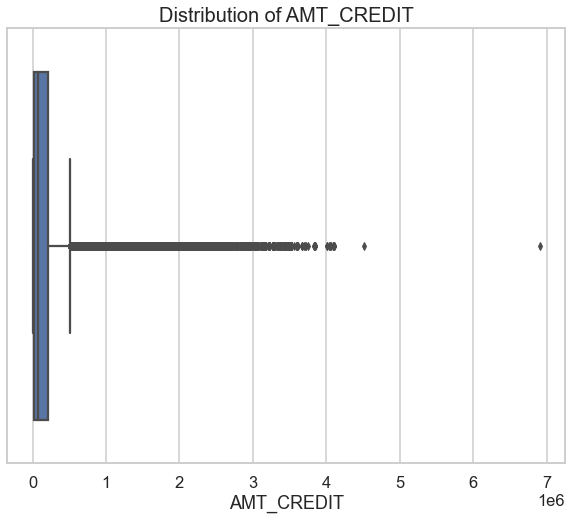

In [2980]:
# 'AMT_CREDIT' tells us about the Credit amount of the loan. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0_prev['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT', fontdict={'fontsize':20} )
plt.show()


**Few points can be concluded from the graph above.**

 		
- **Outlier beyond 4.5 M**




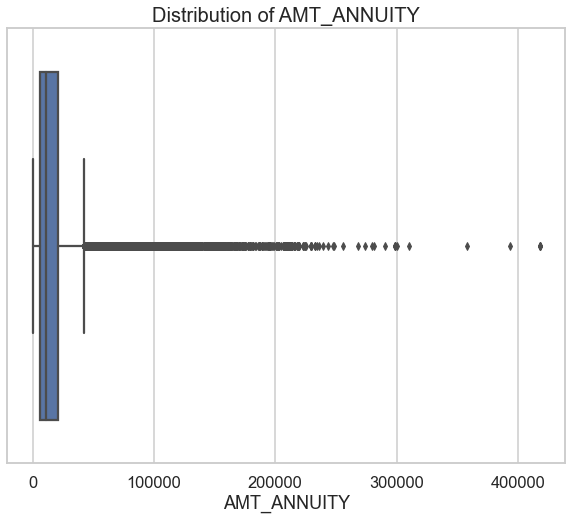

In [2981]:
# 'AMT_ANNUITY' tells us about Loan annuity. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0_prev['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY', fontdict={'fontsize':20} )
plt.show()


**Few points can be concluded from the graph above.**

 		
- **Outlier beyond 3500000**




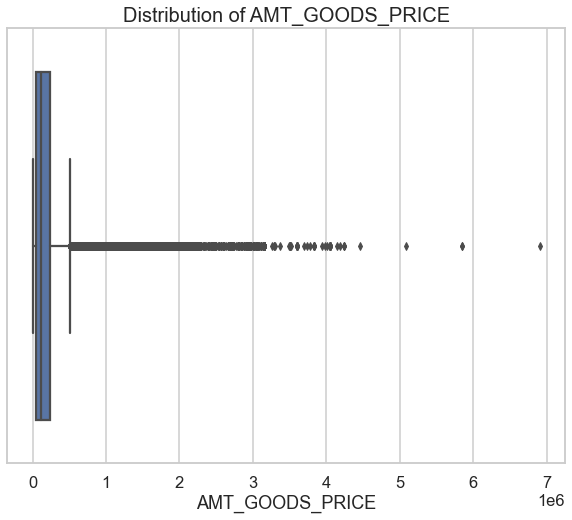

In [2982]:

# 'AMT_GOODS_PRICE' - Goods price of good that client asked for (if applicable) on the previous application. Let's observe a boxplot in order to figure out the outlier
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(inp0_prev['AMT_GOODS_PRICE'])
plt.title('Distribution of AMT_GOODS_PRICE', fontdict={'fontsize':20} )
plt.show()


### Univariate Analysis  - Categorical data

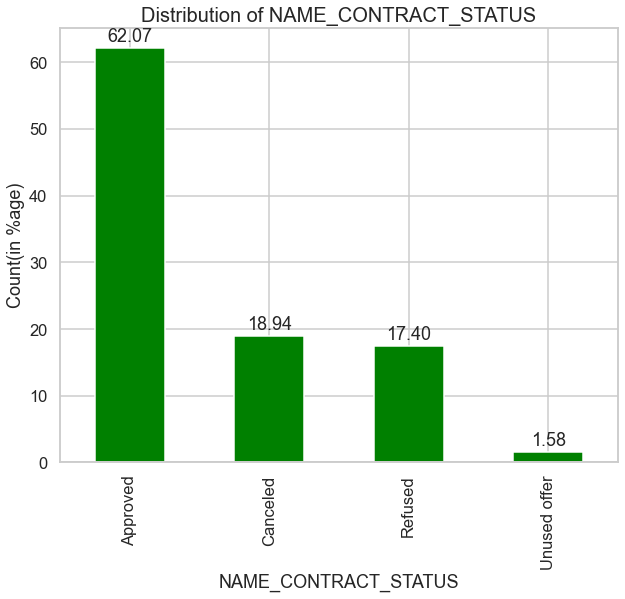

In [2983]:
#plot the bar graph of percentage of NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_CONTRACT_STATUS')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_CONTRACT_STATUS', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Majority of loans are approved**
- **Unsued offer are of very least %age**




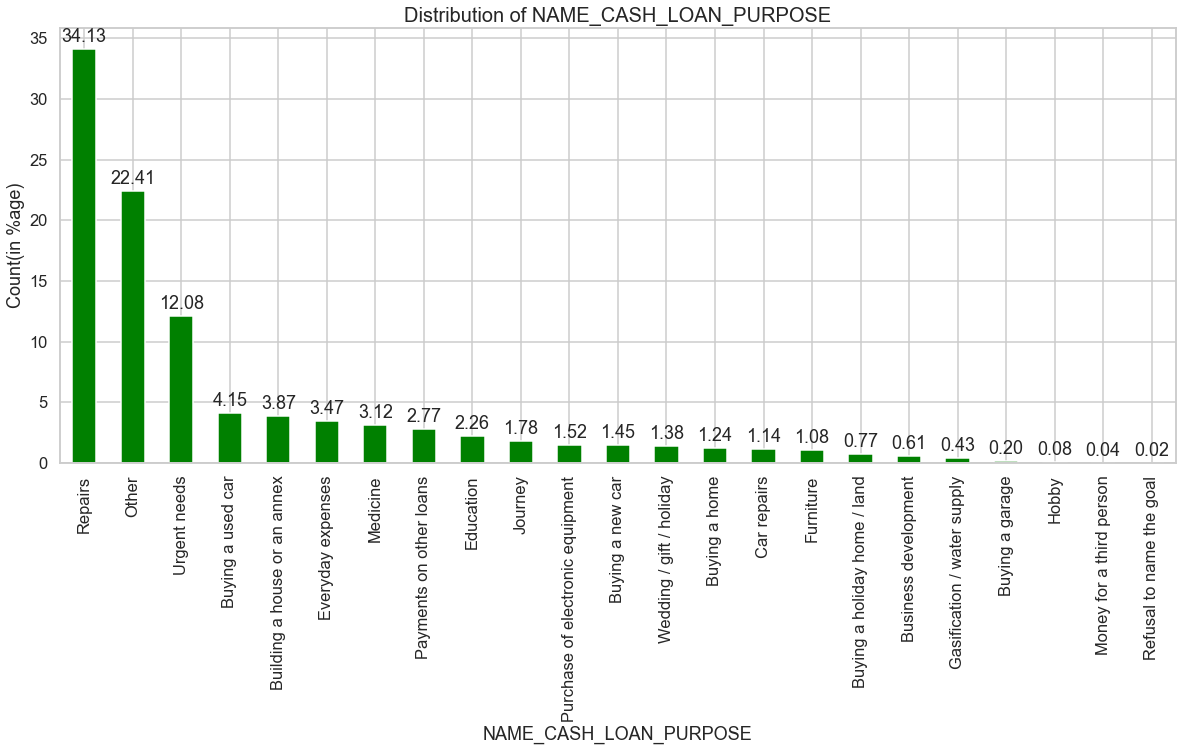

In [2984]:
#plot the bar graph of percentage of NAME_CASH_LOAN_PURPOSE
plt.figure(figsize=[20,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_CASH_LOAN_PURPOSE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_CASH_LOAN_PURPOSE', fontdict={'fontsize':20} )
plt.show()


**Few points can be concluded from the graph above.**

 		
- **Mostly loans are taken for repairs**




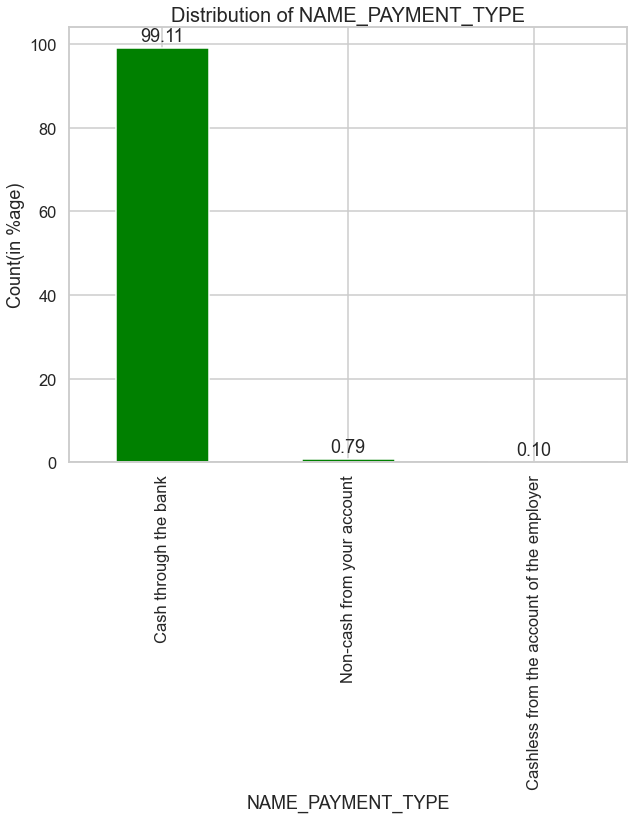

In [2985]:
#plot the bar graph of percentage of NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_PAYMENT_TYPE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_PAYMENT_TYPE', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Cash through bank is preferred the most**




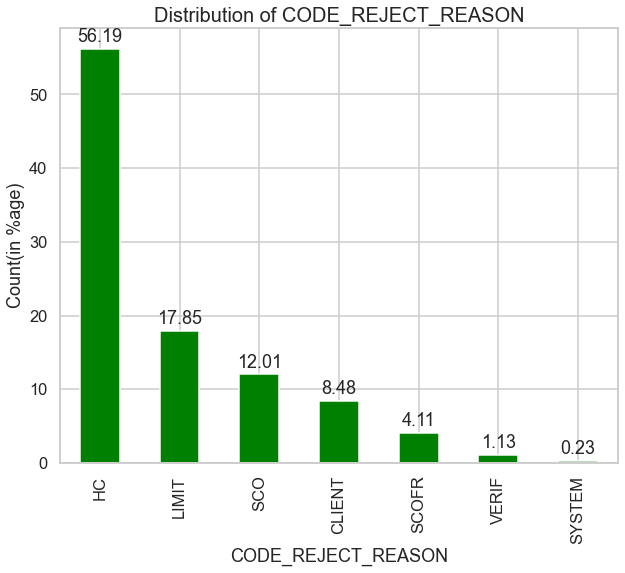

In [2986]:
#plot the bar graph of percentage of CODE_REJECT_REASON - Why was the previous application rejected
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['CODE_REJECT_REASON'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('CODE_REJECT_REASON')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of CODE_REJECT_REASON', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Most of the application got rejected because of CODE_REJECT_REASON = HC (Home credit)**




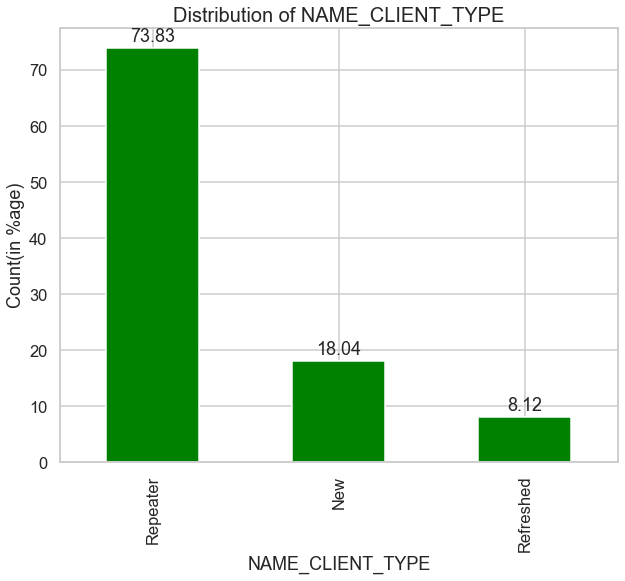

In [2987]:
#plot the bar graph of percentage of NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_CLIENT_TYPE', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Most of the application are of Repeaters**




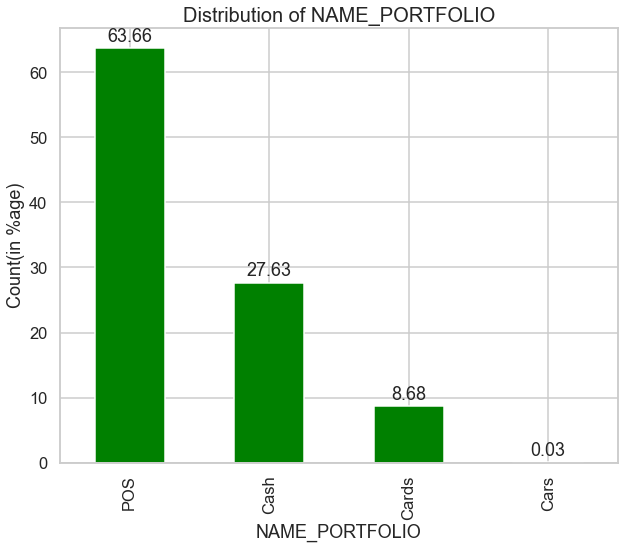

In [2988]:
#plot the bar graph of percentage of NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_PORTFOLIO'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_PORTFOLIO')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_PORTFOLIO', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Around 53% is for NAME_PORTFOLIO = POS**
- **Around 35% is for NAME_PORTFOLIO = Cash**




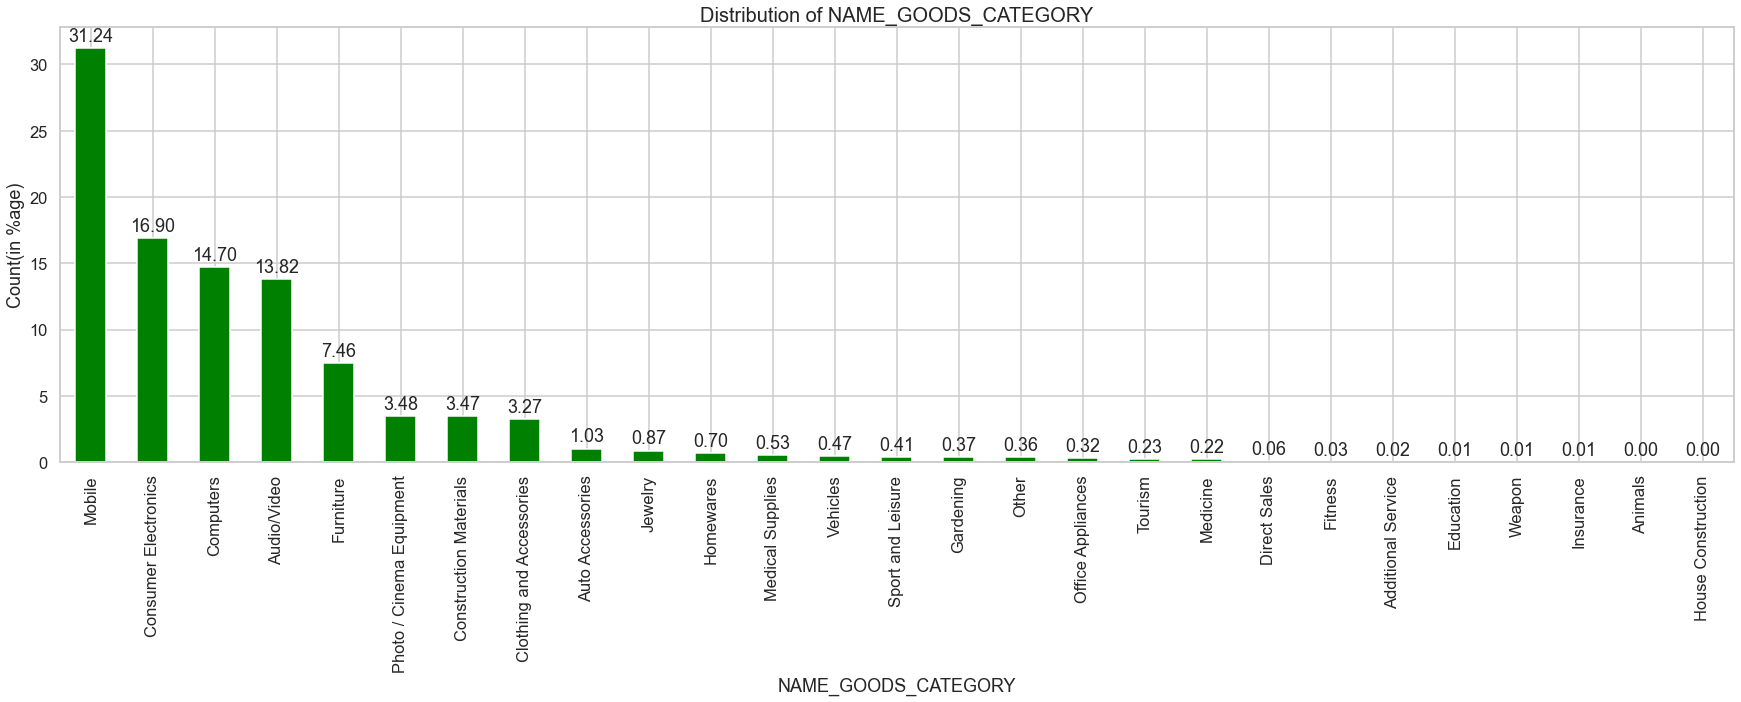

In [2989]:
#plot the bar graph of percentage of NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application
plt.figure(figsize=[30,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_GOODS_CATEGORY'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_GOODS_CATEGORY')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_GOODS_CATEGORY', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Majority of the loan taken because of NAME_GOODS_CATEGORY = Mobile, Consumer Electronics, Computers  and Furniture**




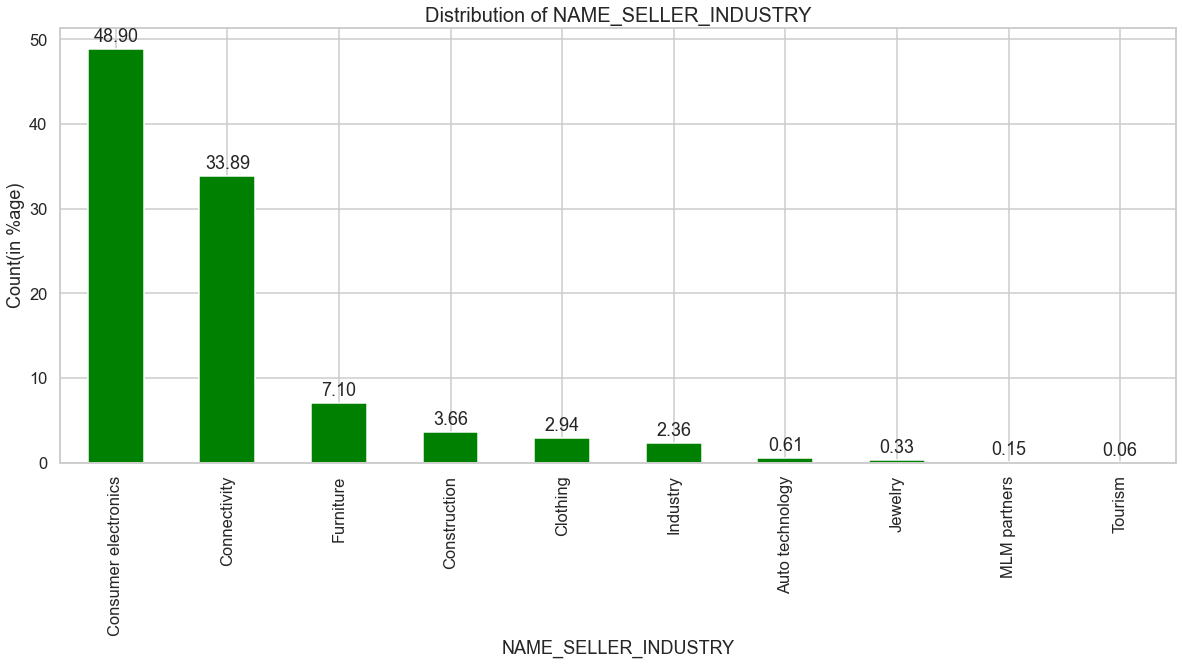

In [2990]:
#plot the bar graph of percentage of NAME_SELLER_INDUSTRY - What kind of goods did the client apply for in the previous application
plt.figure(figsize=[20,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_SELLER_INDUSTRY')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_SELLER_INDUSTRY', fontdict={'fontsize':20} )
plt.show()

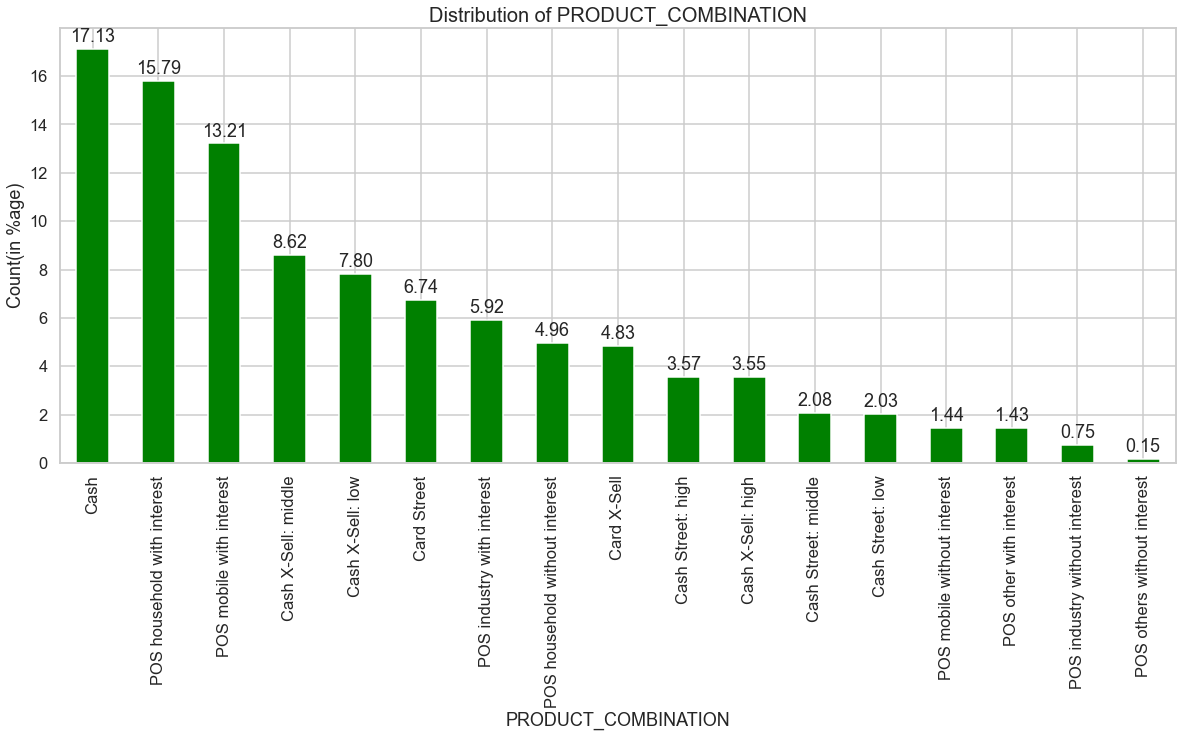

In [2991]:
#plot the bar graph of percentage of PRODUCT_COMBINATION - What kind of goods did the client apply for in the previous application
plt.figure(figsize=[20,8])
sns.set_style('whitegrid')
plot = (inp0_prev['PRODUCT_COMBINATION'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('PRODUCT_COMBINATION')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of PRODUCT_COMBINATION', fontdict={'fontsize':20} )
plt.show()

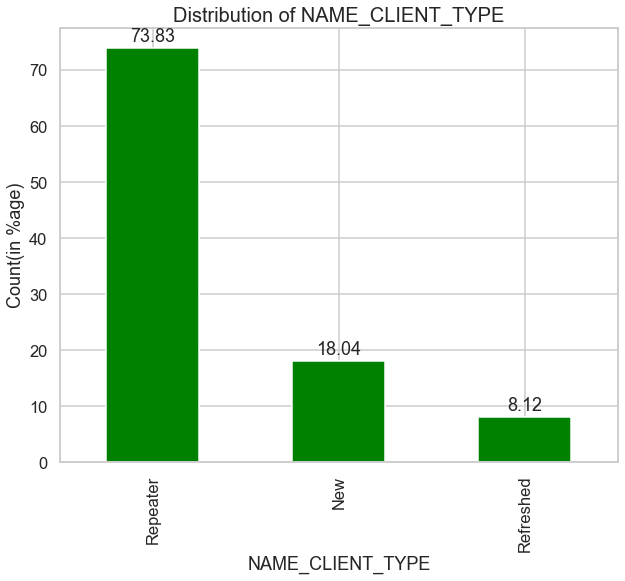

In [2992]:
#plot the bar graph of percentage of NAME_CLIENT_TYPE - Contract status (approved, cancelled, ...) of previous application
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_CLIENT_TYPE', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Repeters are coming back for further loans**




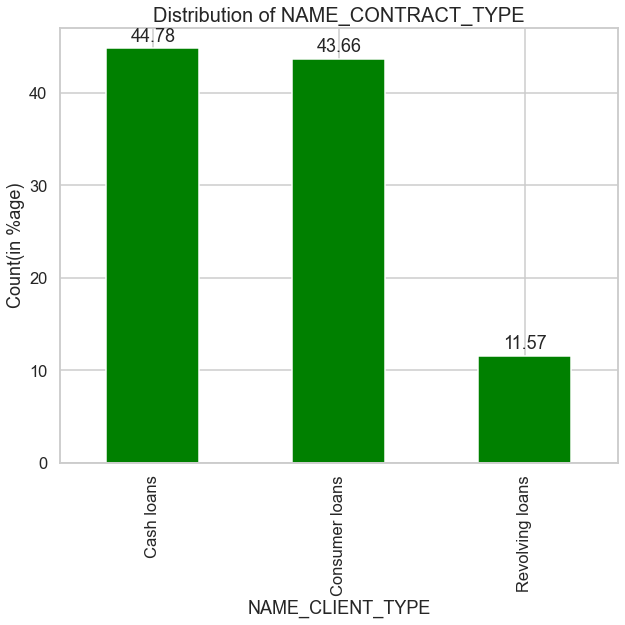

In [2993]:
#plot the bar graph of percentage of NAME_CONTRACT_TYPE - Contract status (approved, cancelled, ...) of previous application
plt.figure(figsize=[10,8])
sns.set_style('whitegrid')
plot = (inp0_prev['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100).plot.bar(color = 'green')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Count(in %age)')
annotateGraph(plot)
plt.title('Distribution of NAME_CONTRACT_TYPE', fontdict={'fontsize':20} )
plt.show()

**Few points can be concluded from the graph above.**

 		
- **Majority of the Cash loans are taken from the previous application**




### Bivariate Analysis - Current Application and Previous Application

In [2994]:
# Let's fetch the SK_ID_CURR and TARGET variable from current application and try to analysis over the previous one for better analysis
inp0_inp0_prev_merge = inp0_prev.merge(inp0[['SK_ID_CURR','TARGET']], on='SK_ID_CURR', how='inner')
inp0_inp0_prev_merge.shape

(1140118, 34)

In [2995]:
inp0_inp0_prev_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     1696966      271877     Consumer loans    68258.655        1800000.0   
2     2154916      271877     Consumer loans    12417.390         108400.5   
3     2802425      108129         Cash loans    25188.615         607500.0   
4     1536272      108129         Cash loans    21709.125         450000.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1   1754721.0        1800000.0                   SATURDAY   
2    119848.5         108400.5                     SUNDAY   
3    679671.0         607500.0                   THURSDAY   
4    512370.0         450000.0                  WEDNESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       18                           Y   
2                       14                           Y   
3                       11                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    NaN             Approved   
1                       1                    NaN              Refused   
2                       1                    NaN             Approved   
3                       1                    NaN             Approved   
4                       1                    NaN             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0            -73  Cash through the bank                NaN             NaN   
1           -472  Cash through the bank                SCO             NaN   
2           -548  Cash through the bank                NaN             NaN   
3           -164                    NaN                NaN   Unaccompanied   
4           -515                    NaN                NaN             NaN   

  NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater                    Mobile            POS               NaN   
1         Repeater  Clothing and Accessories            POS               NaN   
2              New                 Furniture            POS               NaN   
3         Repeater                       NaN           Cash            x-sell   
4         Repeater                       NaN           Cash            x-sell   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   
2             Stone               196            Furniture         12.0   
3    Contact center                -1                  NaN         36.0   
4   AP+ (Cash loan)                 6                  NaN         36.0   

  NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle    POS mobile with interest            365243.0   
1       low_normal  POS industry with interest                 NaN   
2           middle  POS industry with interest            365243.0   
3       low_action            Cash X-Sell: low            365243.0   
4       low_normal            Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1             NaN                        NaN            NaN               NaN   
2          -512.0                     -182.0         -392.0            -387.0   
3          -134.0                      916.0       365243.0          365243.0   
4          -485.0                      565.0         -155.0            -147.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET  
0                        

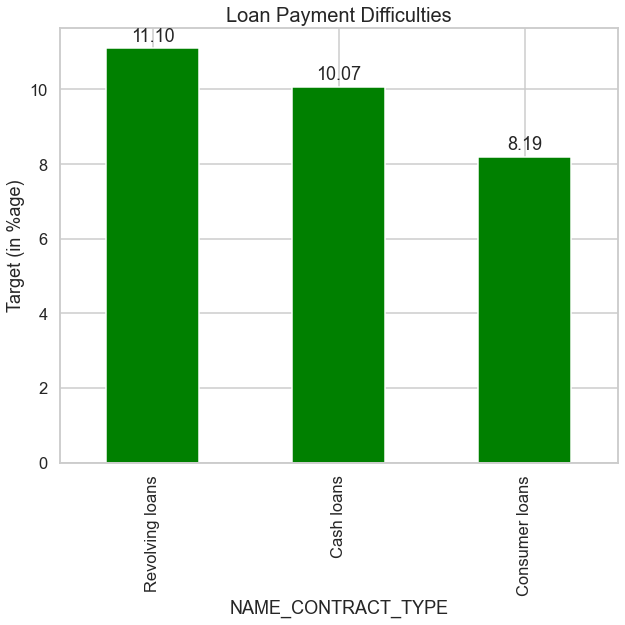

In [2996]:
# NAME_CONTRACT_TYPE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_CONTRACT_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **Majority of NAME_CONTRACT_TYPE = Revolving Loans are with maximum %age of Loan-Payment Difficulties**
- **NAME_CONTRACT_TYPE = Consumer loans are with least %age of Loan-Payment Difficulties**




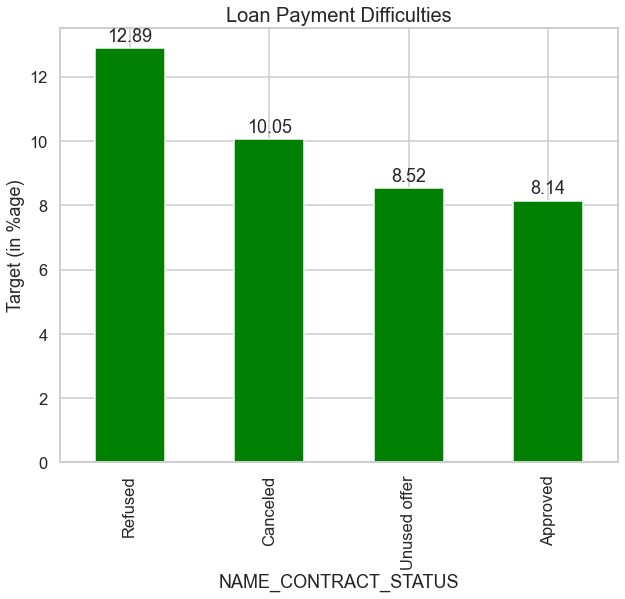

In [2997]:
# NAME_CONTRACT_STATUS v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_CONTRACT_STATUS')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **NAME_CONTRACT_STATUS = Refused from previous application, one with maximum %age of Loan-Payment Difficulties**
- **NAME_CONTRACT_STATUS = Approved from previous application, one with least Loan-Payment Difficulties**




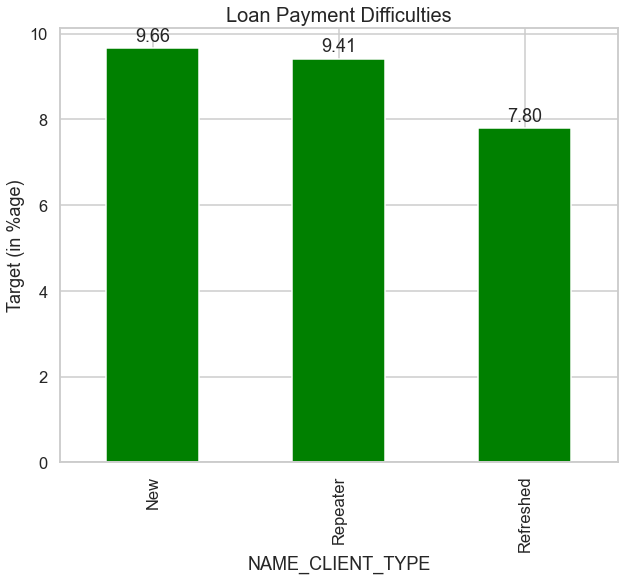

In [2998]:
# NAME_CLIENT_TYPE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_CLIENT_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('NAME_CLIENT_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **Most of the application are from repeaters as we can see above and they have less posibility to be a defaulter**




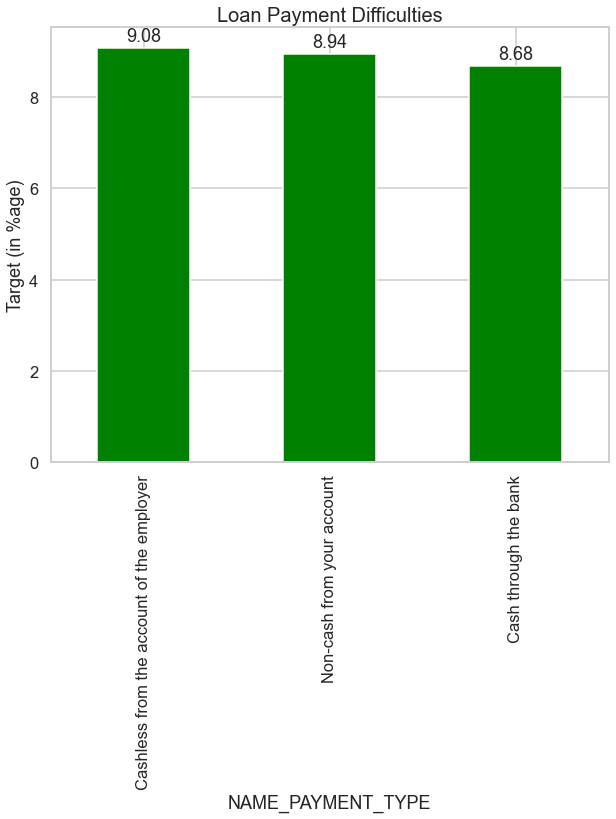

In [2999]:
# NAME_CLIENT_TYPE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_PAYMENT_TYPE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('NAME_PAYMENT_TYPE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **All 3 types of NAME_PAYMENT_TYPE from previous application have somwhat similar %age with Loan Payment Difficulties in current application**





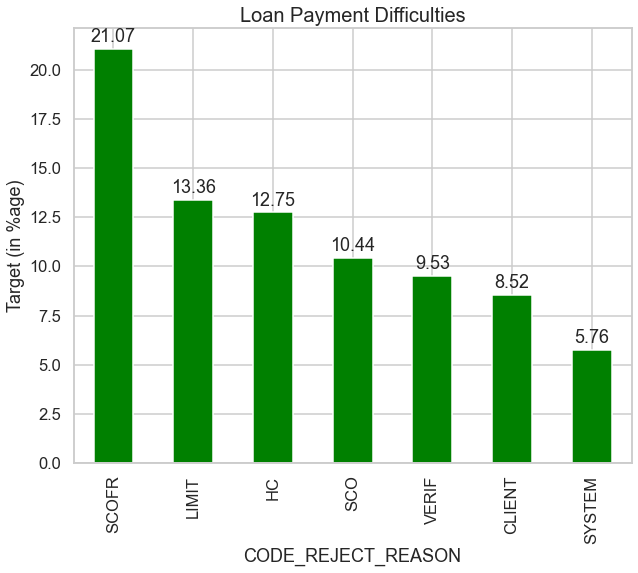

In [3000]:
# CODE_REJECT_REASON v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[10,8])

plt.ylabel('Target (in %age)')
plt.xlabel('CODE_REJECT_REASON')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('CODE_REJECT_REASON')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


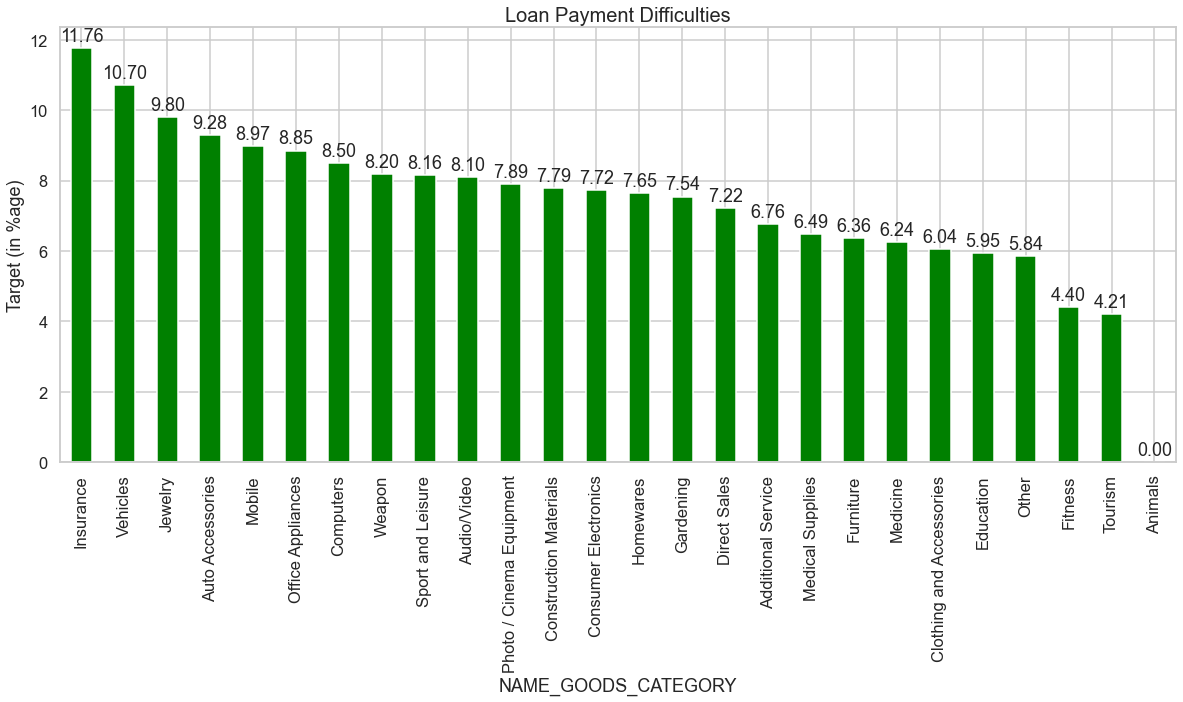

In [3001]:
# NAME_GOODS_CATEGORY v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[20,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_GOODS_CATEGORY')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('NAME_GOODS_CATEGORY')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


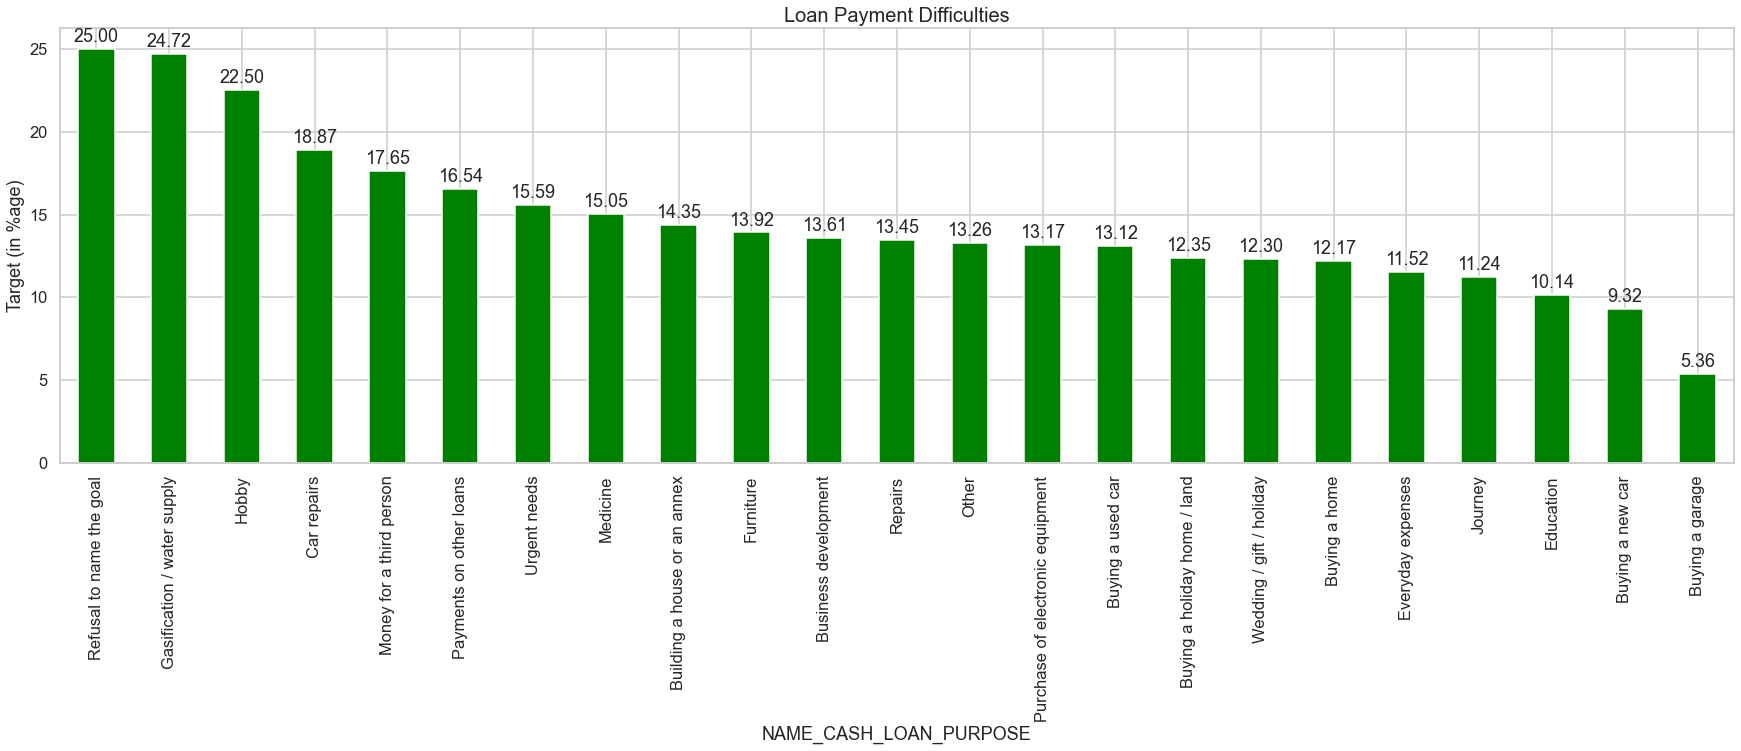

In [3002]:


# NAME_CASH_LOAN_PURPOSE v/s Target Distibution with Loan Payment Difficulties
plt.figure(figsize=[30,8])

plt.ylabel('Target (in %age)')
plt.xlabel('NAME_CASH_LOAN_PURPOSE')

sns.set_style('whitegrid')
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
plot = (inp0_inp0_prev_merge.groupby('NAME_CASH_LOAN_PURPOSE')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar(color = 'green')
annotateGraph(plot)                                                                  


**Few points can be concluded from the graph above.**

 		
- **NAME_CASH_LOAN_PURPOSE = Refusual to name the goal has the highest %age of Loan Payment difficulties.**
- **NAME_CASH_LOAN_PURPOSE = Buying a car/garage has the least %age of Loan Payment difficulties.**





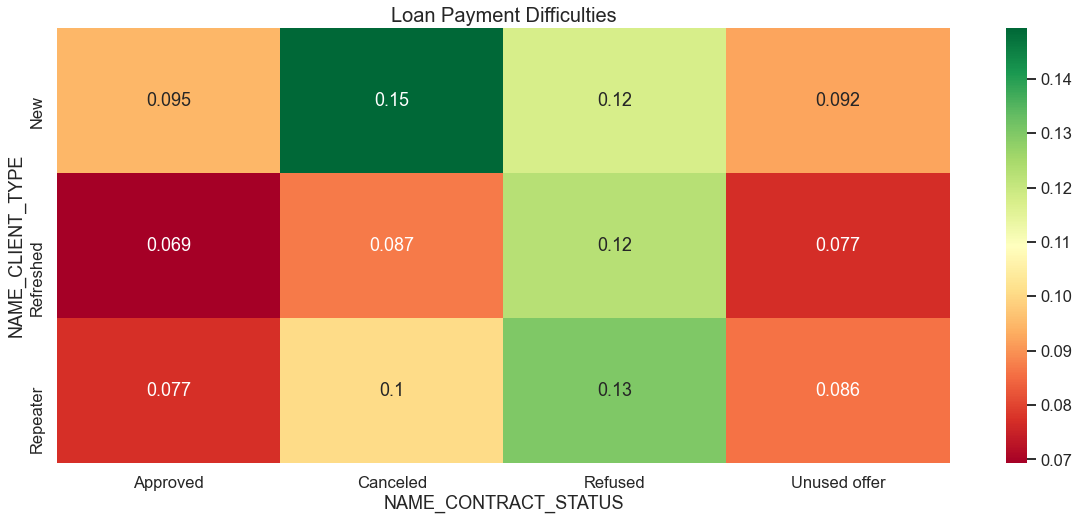

In [3003]:
plt.figure(figsize = [20,8])
plt.title('Loan Payment Difficulties', fontdict={'fontsize':20} )
occup_income = pd.pivot_table(inp0_inp0_prev_merge, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(occup_income, annot = True, cmap = 'RdYlGn')
plt.show()

**Few points can be concluded from the graph above.**

 		
- **NAME_CONTRACT_STATUS = Canceled and NAME_CLIENT_TYPE = New they have high percentage of loan payment difficulties**





### Conclusion

- Males have high possibility to turn out to be a defaulter when compared to female

- One with Academic degree can easily repay the loan.

- Maternity Leave’ distribution is least in ‘NAME_INCOME_TYPE’, and also high %age of payment difficulties- around 40%. Therefore, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.

- Low skilled Laborers occupation type has the least distribution in terms of number, but maximum chances to face difficulties in paying back to bank.


- Banks should try to focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ for successful payments.


- For contract type ‘cash loans’ is having large number of credits than ‘Revolving loans’.  Revolving loans has least possibility for defaulters

- 35-60 and 60+ are less likely to turn out to be defaulter, bank can consider them after considering their source and income range


- With Family status of  'married’ , 'civil marriage’ and 'separated’ of Academic degree education they entertain higher number of credits than others.

- Client with already paying rent can turn out to be defaulters. Client on rented apartment are more frequently interest in taking loan 

- Repeaters are interested in the further loans and less likely to face loan payment difficulties. New client are highly likely to be a defaulter

- Bank should not consider the loan request one which are not clear with the goal as they have highest possibility with Loan payment difficulties


### Suggestion

- Banks should try to focus more on contract type as ‘Student’ ,’pensioner’ and ‘Businessman’ as they are less likely to face payment difficulties
- Bank should focus less on client with already paying rent, they have high chances to turn out to be defaulters. 
- Bank can focus more on client with academic degree, as they have least possibility to face payment difficulties. 
- <18 are mostly the Low-skilled laborers and they do have the high possibility of not repaying back to the bank
- Cash loan are preferred and have high %age with loan payment difficulties
- Bank can focus more on females as they are stepping ahead to take loans and have least probability to turn out to be defaulter
